<h1 style='color:purple'>NUVEM DE PALAVRAS - PERSONAS SÉRIE HISTÓRICA</h1>

<h4 style='color:blue'>Última atualização</h4>

<table style="float:left">
  <tr>
    <th style="text-align:center">Data</th>
    <th style="text-align:center">Autor</th> 
  </tr>
  <tr>
    <td style="text-align:left">24/10/2018</td>
    <td style="text-align:left">Kevin Nakasaki</td> 
  </tr>
</table>

<h2>Importação das bibliotecas</h2>

In [2]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import string

import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

---

<h2>Preparação</h2>

In [3]:
# Mudar para 1 quando for gerar as bases
while True:
    try:
        OPT_GERAR_VW_NUVEM = int(input("Você quer gerar VW_NUVEM? 1-Sim; 0-Não\n"))       
    except ValueError:
        print("O valor inserido não é um número.")
        continue
    else:
        if OPT_GERAR_VW_NUVEM not in range(0,2):
            print("Coloque 1-Sim; 0-Não")
        else:
            break

Você quer gerar VW_NUVEM? 1-Sim; 0-Não
0


<h3 style='color:black'>Informe o número do flight atual</h3>

In [4]:
#Colocar o número do flight atual
while True:
    try:
        FLIGHT_ATUAL = int(input("Qual é o número do flight atual? Insira um valor maior ou igual a 21!\n"))       
    except ValueError:
        print("O valor inserido não é um número.")
        continue
    else:
        if FLIGHT_ATUAL < 21:
            print("Insira um valor maior ou igual a 21!")
        else:
            break

Qual é o número do flight atual? Insira um valor maior ou igual a 21!
21


<h3 style='color:black'>Variáveis PATH para os arquivos</h3>

In [5]:
# Se houver acentuação incorrerá em erro
PATH_R = r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Importacao\SERIE'
PATH_WNV = r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Importacao\NUVEM\%s' % FLIGHT_ATUAL
PATH_NV_IMG = r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Importacao\NUVEM\%s\IMG' % FLIGHT_ATUAL
PATH_FLX = r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Importacao\%s' % str(int(FLIGHT_ATUAL)-1)

<h3 style='color:black'>Definição das funções de leitura e gravação</h3>

In [6]:
def writeNV(dfr, file, enc="UTF-8", sep=','): return dfr.to_csv(PATH_WNV+ r'\{0}.txt'.format(file), header=False, encoding=enc, sep=",", float_format="%.3f", index=False)

---

<h2 style='color:black'>Leitura do arquivo da série histórica</h2>

In [7]:
# Se houver acentuação incorrerá em erro
if FLIGHT_ATUAL == 21:
    df = pd.read_csv(PATH_R + '\SERIE_HISTORICA_v2.txt', sep='\t', encoding= 'ISO-8859-1')
else:
    df = pd.read_csv(PATH_FLX + '\SERIE_HISTORICA_FL{0}.txt'.format(str(int(FLIGHT_ATUAL)-1)), sep='\t', encoding= 'ISO-8859-1')

In [8]:
#df.head()

---

<h2 style='color:black'>Limpeza dos dados</h2>

In [18]:
#Define a função que vai separar as palavras no texto
def words(text): return re.findall(r'\w+', text)

In [9]:
df_nuvem = df.copy()
df_nuvem = df_nuvem[['ID', 'IP', 'FLIGHT', 'CELEBRIDADE', 'OPINIAO']]
#df_nuvem

In [10]:
df_nuvem['OPINIAO'] = df_nuvem['OPINIAO'].astype(str)

<h3 style='color:black'>Lower case</h3>

In [11]:
df_nuvem['OPINIAO'] = df_nuvem['OPINIAO'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_nuvem['OPINIAO']

0                                             ótima cantora
1                              ela.é.uma.esselente.cantora.
2         canta muito bem, tem uma voz linda e acho uma ...
3               adoro ela, sempre querida e muito simpatica
4                                             otima cantora
5         também uma mulher guerreira, batalhadora. mulh...
6                                         um ótima cantora.
7                  gosto dela, ela é uma pessoa carismática
8         adoro suas músicas,amo sua voz,uma grande cantora
9                               não escuto as musicas dela.
10                                      grande ícone da mpb
11        cantora muito respeitada, voz belissima, sempr...
12        não a conheço pessoalmente mas adoro as musica...
13                          nada,não gosto das musicas dela
14                                            otima cantora
15                                       uma ótima cantora.
16                     corajosa, batalha

<h3 style='color:black'>Pontuação</h3>

In [12]:
# Cria uma cópia do dataframe da nuvem para fazer a limpeza e tratamento
# Substitui todas as pontuações por um único espaço em branco. Implicação: onde tem
# a pontuação mas e um espaço antes ou depois, ficará com dois espaços de distância.
df_nuvem2 = df_nuvem.copy()
df_nuvem2['OPINIAO'] = df_nuvem2['OPINIAO'].str.replace('[^\w\s]',' ')
df_nuvem2['OPINIAO']

0                                             ótima cantora
1                              ela é uma esselente cantora 
2         canta muito bem  tem uma voz linda e acho uma ...
3               adoro ela  sempre querida e muito simpatica
4                                             otima cantora
5         também uma mulher guerreira  batalhadora  mulh...
6                                         um ótima cantora 
7                  gosto dela  ela é uma pessoa carismática
8         adoro suas músicas amo sua voz uma grande cantora
9                               não escuto as musicas dela 
10                                      grande ícone da mpb
11        cantora muito respeitada  voz belissima  sempr...
12        não a conheço pessoalmente mas adoro as musica...
13                          nada não gosto das musicas dela
14                                            otima cantora
15                                       uma ótima cantora 
16                     corajosa  batalha

In [13]:
# Substitui onde existe mais de um espaço em branco por apenas um
df_nuvem2['OPINIAO'] = df_nuvem2['OPINIAO'].str.replace('\s+', ' ')
df_nuvem2['OPINIAO'].replace('^\s+', '', regex=True, inplace=True) #front
df_nuvem2['OPINIAO'].replace('\s+$', '', regex=True, inplace=True) #end

<h3 style='color:black'>Stop words</h3>

In [14]:
#Limpeza com stopwords
stops = stopwords.words('portuguese')
df_nuvem2['OPINIAO'] = df_nuvem2['OPINIAO'].apply(lambda x: " ".join(x for x in x.split() if x not in stops))
df_nuvem2['OPINIAO']

0                                             ótima cantora
1                                       é esselente cantora
2         canta bem voz linda acho pessoa simpatica honesta
3                            adoro sempre querida simpatica
4                                             otima cantora
5         mulher guerreira batalhadora mulher forte bras...
6                                             ótima cantora
7                                gosto é pessoa carismática
8                      adoro músicas amo voz grande cantora
9                                            escuto musicas
10                                         grande ícone mpb
11            cantora respeitada voz belissima sempre mídia
12                       conheço pessoalmente adoro musicas
13                                       nada gosto musicas
14                                            otima cantora
15                                            ótima cantora
16                       corajosa batalh

<h3 style='color:gray'>Corretor de texto (Google - Descontinuado)</h3>

---

<h3 style='color:black'>Exclusão de números e valores nulos</h3>

In [15]:
df_nuvem2['OPINIAO'] = df_nuvem2['OPINIAO'].str.replace('\d+', '')

In [16]:
df_nuvem2 = df_nuvem2.loc[df_nuvem2['OPINIAO'] != 'nan']

---

<h3 style='color:red'>Arquivo com todas as palavras para correção (24/10/2018)</h3>

In [19]:
df_nuvem5 = df_nuvem2['OPINIAO'].apply(words)

In [20]:
WORDS5 = []
for sublist in df_nuvem5:
    for item in sublist:
        WORDS5.append(item)

In [21]:
ct_palavras = Counter(WORDS5)

In [39]:
ct_palavras

Counter({'ótima': 12223,
         'cantora': 5842,
         'é': 19047,
         'esselente': 3,
         'canta': 1688,
         'bem': 7803,
         'voz': 603,
         'linda': 18546,
         'acho': 9939,
         'pessoa': 17490,
         'simpatica': 3966,
         'honesta': 422,
         'adoro': 2206,
         'sempre': 974,
         'querida': 540,
         'otima': 7098,
         'mulher': 2155,
         'guerreira': 373,
         'batalhadora': 519,
         'forte': 925,
         'brasileira': 1022,
         'músicas': 640,
         'respeitada': 87,
         'amada': 27,
         'todos': 425,
         'gosto': 10712,
         'carismática': 2807,
         'amo': 480,
         'grande': 3131,
         'escuto': 22,
         'musicas': 561,
         'ícone': 126,
         'mpb': 19,
         'belissima': 45,
         'mídia': 723,
         'conheço': 11376,
         'pessoalmente': 253,
         'nada': 6723,
         'corajosa': 87,
         'sucesso': 1034,
         '

In [43]:
#criar um dataframe utilizando o ct_palavras para gerar o arquivo e depois ver as palavras que aparecem para filtrar e corrigir

---

<h3 style='color:red'>Corretor de texto (24/10/2018)</h3>

In [64]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [69]:
#dado: O dado será a coluna que será analisada, no nosso caso a coluna Diagnostico.
#lista: A lista de dados que será usada para análise.
#tipo_score: A função que vamos usar para calcular a similaridade, pode ser a ratio, partial_ratio ou qualquer outra mostrada anteriormente.
#valor_corte: O indice mínimo de similaridade que queremos.
def corretor(dado, lista, tipo_score, valor_corte):
    return process.extractOne(dado, choices=lista, scorer=tipo_score, score_cutoff=valor_corte)

In [67]:
dicionario = pd.read_csv(r'C:\Users\Kevin Nakasaki\Desktop\palavras-master\palavras.txt', sep='\t', encoding= 'ISO-8859-1')

In [89]:
for i, r in df_nuvem5.iteritems():
    for x in r:
        process.extractOne()

ótima
cantora
é
esselente
cantora
canta
bem
voz
linda
acho
pessoa
simpatica
honesta
adoro
sempre
querida
simpatica
otima
cantora
mulher
guerreira
batalhadora
mulher
forte
brasileira
adoro
músicas
canta
é
respeitada
amada
todos
ótima
cantora
gosto
é
pessoa
carismática
adoro
músicas
amo
voz
grande
cantora
escuto
musicas
grande
ícone
mpb
cantora
respeitada
voz
belissima
sempre
mídia
conheço
pessoalmente
adoro
musicas
nada
gosto
musicas
otima
cantora
ótima
cantora
corajosa
batalhadora
otima
cantora
pessoa
bem
sucesso
personalidade
forte
otima
cantora
adorooooo
marrom
adoro
samba
talentosa
é
maravilhosa
adoro
popular
ótima
cantora
é
pessoa
carismática
simpática
divertida
interessante
òtima
cantora
sambista
ótima
cantora
otima
sei
é
ótima
cantora
bela
voz
canta
bem
gosto
respeitosa
boa
cantora
cantora
fantástica
grande
talento
excelente
cantora
adoro
pessoa
publica
rainha
samba
adoro
cantora
fez
sucesso
outras
epocas
maravilhosa
otima
cantora
artista
peso
bonita
canta
humilde
pessoa
respeito

parece
pessoa
qualquer
nao
conheço
nao
sei
simpático
lembro
nome
gosto
trabalho
otimo
ator
conheço
bom
profissional
vi
novela
lembro
nome
bom
ator
ainda
papéis
pouco
apagados
nehuma
vi
tv
conheço
bom
ator
lindonv
sei
gostei
nao
conheço
n
parece
ser
pessoa
legal
humilde
bom
carater
conheço
lembro
é
pessoa
sei
nome
bonita
sei
conheço
sei
porque
conheço
conheço
nenhuma
conheço
nao
sei
nada
nao
conheço
lembro
conheço
comentarios
bonita
linda
bonita
simpatica
nao
sei
conheço
bonita
pegaria
boas
nunca
ví
lembro
nenhuma
novela
tv
conheço
posso
conheço
sei
simpatica
é
atriz
sei
desconheço
nao
conheço
conheço
nao
conheco
neutra
simpática
posso
falar
alguém
conheço
bonita
sei
é
atriz
boa
nunca
vi
possuo
pois
conheço
acho
bonita
cara
putra
comentários
rosto
parece
pouco
familiar
nada
nao
conheco
otima
atriz
aparência
bem
bonita
sei
nao
conheco
nao
sei
é
conheço
bonita
conheço
conheço
connheço
nao
sei
nao
nao
sei
ouvi
nome
nenhuma
pois
conheço
conheço
conheço
nao
conheço
conheço
parece
pessoa
fals

meiga
carinhosa
acho
simpática
fã
admiro
relação
luciano
hulk
nada
boa
apresentadora
programa
fraco
parece
ser
simpática
acho
boa
pessoa
acho
faz
bom
trabalho
serviço
desempenha
gosto
bonita
acho
ótima
pessoa
gosto
aparenta
ser
pessoa
discreta
vida
pessoal
simpática
bonita
chic
carismática
excelente
profissional
parece
ser
câmeras
ótima
pessoa
bem
simpática
otim
apresentadora
artista
q
muitos
anos
globo
casada
luciano
hulk
boa
pessoa
bonita
divertida
talentosa
antipática
simpática
autentica
sigo
carreira
então
dizer
parece
boa
pessoa
acho
extremamente
linda
ótima
profissional
casou
homem
bem
sucedido
lindos
filhos
pessoa
normal
boa
apresentadora
boa
apresentadora
atriz
cantora
simpática
linda
graça
legal
acho
deu
virada
vida
casar
pois
antes
parecia
frustrada
nao
ser
rainha
baixinhos
hoje
vive
plenitude
felicidade
ate
simpática
boa
apresentadora
tv
acredito
boa
mãe
acho
bonita
simpática
mulher
guerreira
batalhadora
acima
tudo
excelente
mãe
esposa
boa
apresentadora
meio
antipática
é
div

conheço
sorriso
lindo
opnião
nenhuma
possuo
opnião
linda
simpática
conheço
seui
eh
nao
conheço
boa
profissional
bonita
simpatica
opinião
sei
lembro
otima
atriz
linda
nao
lembro
nome
todas
novelas
presente
otia
profisional
opniao
formada
sei
nada
muita
acho
pegavel
nd
boa
atriz
bonita
pessoa
simpática
inteligente
boa
atriz
conheço
bonita
nao
sei
conheço
conheço
sei
nunca
vi
nenhuma
nenhuma
acho
boa
atriz
sei
conheço
conheço
binita
bom
atriz
lembro
nome
ótima
lembraria
nenhuma
é
conhecida
sei
conheço
bonita
nenhuma
conheço
sei
é
bonita
conheço
boa
atriz
atualmente
trabalhando
novela
sei
nunca
vi
nao
sei
nao
nada
nn
boa
atriz
boa
atriz
bonita
carismatica
inteligente
apesar
ser
jovem
iniciante
carreira
atriz
aparenta
ser
talentosa
determinada
papeis
novela
profissionalmente
faz
bem
função
nada
é
boa
atriz
acho
pessoa
bem
dedicada
trabalho
jovem
atriz
grande
potencial
bonita
simpática
ótima
atriz
além
parecer
pessoa
bem
humilde
bonita
acho
nado
ótima
profissional
boa
atriz
linda
bonita
simp

grande
ator
ja
oportunidade
ver
peça
teatro
pessoa
educado
gentil
bom
ator
otimo
artista
otimo
ator
simpático
nã
sei
nome
sei
ã
ator
ã
ator
bom
inteligente
engraã
ado
nao
sei
é
nã
sei
acho
talentoso
charmoso
inteligente
sei
bom
ator
envolvido
trabalho
desempenho
forte
cheio
emoções
parece
trabalhar
mídia
moda
bom
ator
ótimo
ator
grande
carisma
é
simpático
otimo
ator
ã
atores
requisitados
cinemas
ator
normal
lindo
demosntra
ser
pessoa
inteligente
acho
ótimo
ator
ã
bom
ator
bonito
profissional
nunca
vi
confusão
bonito
simpático
ótimo
ator
sei
ótimo
ator
nenhuma
opinião
formada
sobre
conheço
acho
legal
bom
ator
bom
ator
nada
bom
ator
bonito
carismático
bom
ator
bonito
bom
ator
nenhuma
ator
conceituado
ã
bom
ator
bom
ator
bonito
cara
bravo
risos
legal
bom
ator
simpático
bonito
pessoa
bonita
bom
ator
bonito
bom
ator
conheço
profissão
é
pessoa
inteligente
bom
ator
bom
ator
acho
ator
talentoso
bonitão
apenas
acho
ator
bom
é
bom
ator
ator
tranquilo
bom
faz
calmo
tranquilo
bom
ator
parece
ser
g

bom
ator
bonito
bom
faz
bonito
bom
ator
bom
ator
pessoa
presença
otimo
ator
carismatico
nao
sei
nada
declarar
nenhuma
otimo
composito
nada
declarar
tenhpo
pinião
formada
n
sei
porque
esei
é
nao
to
lembrado
boa
nada
ótimo
músico
gosto
nada
opinião
pois
conheço
opinião
formada
faz
tipo
música
gosto
acho
excelente
artista
apesar
gostar
jeito
exagerado
querendo
aparecer
demais
mesma
anteriores
carater
bom
talentoso
carismático
influencia
é
bom
músico
menos
inteligente
criativo
inovador
etc
normal
gosto
cantor
pareci
ser
ótima
pessoa
sei
é
conheço
alegre
inteligente
gosto
faz
legal
gosto
estilo
musicas
belo
cantor
bacana
povo
otimo
músico
compositor
admiro
trabalho
acho
músico
sensacional
personalidade
humor
incrivel
bom
músico
percussionista
inteligente
posso
opinar
pois
conheço
adoro
super
cativante
legal
acho
percursionista
bom
melhores
músico
cantor
compositor
baiano
conhecido
internacionalmente
autor
canções
sucesso
marisa
monte
pessoa
caridosa
honesta
bom
caráter
profissional
sucesso


atriz
bonita
deve
ser
atriz
é
boa
atriz
falar
beleza
excelente
atriz
parece
ser
metidinha
nunca
envolveu
escandalos
pessoa
respeitavel
é
boa
atriz
boa
atriz
é
poco
cheia
si
podia
melhorar
è
ótima
atriz
admiro
trabalho
excelente
atriz
nenhuma
boa
atriz
adoro
trabalho
linda
sensual
inteligente
acompanho
mídia
gosto
acho
antipática
tenta
ser
legal
parace
ser
forçado
linda
ótima
atriz
pessoa
divertida
acho
é
pessoa
elegante
carismática
linda
bonita
inteligente
parece
ser
legal
simpatica
ohhhh
la
casa
viu
boa
atriz
profissional
carismática
otima
atriz
otima
atriz
alem
ser
linda
boa
faz
gosto
bastate
dessa
atriz
bela
atriz
tbm
umas
pessoa
atraente
bem
engraçada
menos
papeis
atuou
excelente
atriz
carismatica
é
linda
talentosa
veja
atriz
global
atriz
super
inteligente
é
grande
atriz
gosta
atuar
pois
personagens
bons
excelente
atriz
ótima
atriz
conheço
apenas
televisão
bonita
bonita
normal
boa
atriz
é
boa
atriz
antipática
simpatica
atraente
boa
atriz
nao
nenhuma
opinião
formada
linda
inteligent

sei
é
bonita
conheço
conheço
bonita
ñ
conheço
bonita
sei
falar
nunca
vi
olho
bonito
nada
falar
gosto
músicas
é
ótima
compositora
deixa
desejar
atuação
excelente
cantora
compositora
atriz
comediante
diretora
gosto
trabalho
voz
boa
cantar
engraçada
meiga
simples
maravilhosa
acho
excelente
atriz
comédia
pessoa
faz
sucesso
ótima
cantora
acho
excelente
cantora
compositora
humorista
divertida
inteligente
criativa
super
inteligente
cômica
criativa
divertida
engraçada
boa
atriz
cantora
voz
irritante
canta
bem
atriz
legal
engraçada
talentosa
boa
atriz
linda
boa
musicata
atriz
cantora
super
engraçada
talentosa
legalzinha
engraçada
bonita
ótima
atriz
compositora
talentosa
bonita
criativa
engraçada
inteligente
boa
atriz
engraçada
bela
acho
engraçada
estilo
humor
agrada
voz
é
legal
inteligente
criativa
excelente
artista
nenhuma
opinião
formada
engraçada
talentosa
apresentações
pouco
chatinha
pessoalmente
falar
bonita
exteriormente
sei
fez
musica
q
ficou
famosa
via
youtube
criativa
espontânea
ótima


chelsea
nao
opinião
formada
é
excelente
jogar
futebol
otimo
jogador
futebol
é
ótimo
jogador
futebol
conhecido
vitalidade
campo
cabeleira
faz
sucesso
estádios
joga
bem
futebol
marrento
gente
boa
simpatico
esforçado
nessa
última
copa
confederações
comecei
saber
passou
impressão
ser
menino
centrado
responsável
irreverente
bom
jogador
jogador
futebol
conhecido
seleção
brasileira
excelente
jogador
humilde
gente
boa
ótimo
jogador
zagueiro
é
fofo
amor
pessoa
parece
ser
bem
humilde
aparenta
participar
causa
humanitárias
fazer
doações
além
tudo
é
gatinho
melhor
amigo
loiro
liiiiindo
é
delícia
tudo
bom
ai
então
é
jogador
futebol
experiente
conhecido
apesar
recordar
nome
acho
competente
ótimo
jogador
grande
zagueiro
guerreiro
esforcado
ótimo
zagueiro
indiferente
bom
jogador
futebol
bom
jogador
bom
jogador
fotebol
bom
jogador
bom
jogador
bom
jogador
joga
bem
chelsea
neutro
é
bom
jogador
futebol
pessoa
parece
ser
bom
simpático
jogador
futebol
ótimo
jogador
bom
jogador
ruim
parece
talentoso
atleta
b

profissional
bom
goleiro
bom
goleiro
gosto
futebol
melhor
goleiro
brasil
bom
goleiro
ótimo
profissional
jogou
palmeiras
bom
goleiro
ótimo
goleiro
bom
goleiro
bonito
opinião
sobre
sei
é
goleiro
futebol
grande
goleiro
bom
golero
ótimo
goleiro
excelente
goleiro
pessoa
tranquila
parece
ser
gente
boa
lembro
bom
goleiro
ótimo
goleiro
bom
goleiro
otimo
goleiro
sd
kkvn
òtimo
goleiro
nivel
seleção
determinado
nada
bom
goleiro
bom
goleiro
parece
ser
pessoa
humilde
excelente
atleta
bom
goleiro
é
grande
profissional
rapaz
bonito
trabalhador
goleiro
fluminense
sei
sobre
bom
jogador
pessoa
boa
simples
grande
personalidade
conheço
nao
sei
nenhuma
nao
sei
consigo
dizer
pois
sei
é
sei
comentário
nao
conheço
nao
nao
opiniao
formada
nunca
vi
vida
nao
sei
lindo
simpático
conheço
nenhuma
nenhuma
nao
sei
nao
conheco
conheço
sei
sei
nada
dizer
nao
sei
nunca
vi
vda
sei
é
nao
nenhuma
conheço
bonito
conheço
sei
conheço
conheco
nao
conheço
opinião
parece
ser
boa
pessoa
naa
sei
nao
conheço
deve
ser
jogador
futebo

engraçado
carismático
sincero
engraçado
super
engraçado
otimo
ator
engraçado
carismático
engraçado
inovador
empreendedor
engraçado
super
engracado
é
engraçado
otimo
ator
humorista
engraçado
representa
nova
safra
humoristas
brasileiros
engraçado
bom
comediante
gosto
engraçado
engraçado
engraçado
engraçado
espontâneo
engraçado
grande
humorista
ator
fã
trabalho
é
humor
ta
bem
divertido
parcipando
fantástico
ótimo
ator
gosto
engraçado
simpática
personalidade
forte
engraçado
talentoso
legal
engraçado
engraçado
humorista
sucesso
inteligente
engraçado
engraçado
inteligente
engraçado
bom
ator
bom
humorista
é
divertido
inteligente
engraçado
engraçado
engraçado
gosto
é
engraçado
divertido
extrovertido
dinamico
bom
humorista
inteligente
engraçado
carismatico
gente
boa
ótimo
humorista
é
excelente
ator
engraçado
engraçado
engraçado
otimo
comediante
engraçado
engraçado
bom
comediante
engraçado
competente
gosto
ótimo
comediante
nao
n
boa
apresentadora
simbolo
mae
mullher
talentosa
carismatica
otima
p

vi
tv
acho
é
cqc
sei
bem
é
conheço
nao
sei
nao
nada
declarar
nao
nada
sobre
nao
ha
conheõ
nao
nenhuma
nunca
vi
pessoa
conheço
sei
la
sei
é
nao
conheço
bonito
parece
ser
inteligente
posso
opinar
conheço
nao
conheco
é
bonito
nada
nao
parece
simpatico
conheço
sei
sei
é
portanto
posso
conceitua
lo
conheço
sei
sei
conheço
sei
é
nenhuma
acho
nada
sei
nao
sei
sei
nao
sai
conheço
nao
conheço
suficiente
ter
opiniao
sobre
divertido
engraçado
ótimo
apresentador
bonito
bom
humorista
engraçada
inteligente
bonito
engraçado
inteligente
engraçado
atrevido
lega
divertido
nao
sei
nada
respeito
pessoa
inteligente
bem
humorada
cara
esperto
sabe
fazer
humor
questões
interessam
povo
entende
pouco
sobre
esportes
gosto
acho
engraçado
tanto
cqc
personagem
motoboy
faz
jackson
five
é
repórter
cqc
rede
bandeirantes
humorista
apresentador
bom
gosto
trabalho
gosto
trabalho
humorista
cqc
acho
engracado
trabalha
cqc
portanto
aparenta
ser
sério
entanto
ponto
entreter
eventuais
piadas
programa
simpática
bom
apresentado

tambem
fez
video
show
boa
atriz
temperamento
forte
pessoa
bonita
aparenta
elegancia
boa
atriz
acho
bonita
interessante
parece
ser
pessoa
simpatica
ótima
pessoa
determinada
vencedora
nada
declarar
linda
bonita
é
pessoa
famosa
dinheiro
cuida
corpo
cabelo
é
atriz
nível
superior
parece
ser
legal
pouquinho
metida
acho
linda
atriz
bonita
boa
atriz
bonita
é
boa
atriz
acho
pessoa
voz
chata
grande
atriz
estilosa
gracinha
rsrs
graça
sorriso
lindo
cativante
atriz
modelo
razoavel
atriz
boa
atriz
modelo
bonita
bonita
confiante
profissão
disposta
agradavel
alegre
opinião
apenas
acho
bonita
acho
é
simpática
carismática
bacana
linda
pessoa
muita
influência
bonita
parece
ser
simpática
bonita
carismática
simpática
talentosa
n
jgyjyjh
é
bonita
simpática
é
atriz
linda
atriz
modelo
bonita
sedutora
bonita
linda
profissional
sei
opinar
linda
boa
arroz
apresentadora
bonita
opinião
formada
sobre
parece
ser
boa
pessoa
simpática
pessoa
boa
normal
boa
apresentadora
atriz
conheço
sobre
trabalho
linda
simpática
ext

estilo
diferente
fã
música
pessoa
bom
carater
engraçada
boa
cantora
pessoa
simples
cantora
brega
acho
antipática
sei
é
simplicidade
toda
demonstra
pra
mim
canta
nada
divertida
inteligente
irreverente
vulgar
cantora
profissional
exagerada
diva
chata
irritante
adora
estar
mídia
aparecer
looks
escandalosos
boa
cantora
autêntica
simpática
cantora
cantora
tecnobrega
faz
sucesso
brasil
todo
extravagante
divertida
opinião
formada
boa
cantora
simpatica
engraçada
boa
cantora
moda
simpática
gosto
personalidade
musica
veio
inovar
estilo
musical
espalhafatosa
comprometida
pessoa
humilde
talentosa
estilosa
pessoa
alegre
divertida
brega
divertida
divertida
ótima
cantora
guerreira
sei
pouco
pr
opinar
mulher
dúvida
batalhadora
gorda
talento
batalha
ter
lugar
sol
consegue
simpática
é
cantora
compositora
brasileira
pop
tecnobrega
mpb
brega
cantora
estoruou
repentinamente
sucesso
agora
ja
mìdia
acho
cantora
exótica
talento
opinião
sei
muita
coisa
gorda
acho
brega
legal
linda
boa
cantora
engraçada
conheço

linda
atraente
sabe
faz
linda
gata
linda
linda
carismática
modelo
sucesso
modelo
carreira
internacional
bem
sucedida
admiro
linda
carismatica
simpatica
ainda
linda
bonita
bonita
esperta
opinião
bonita
nada
ótima
atriz
sei
nada
pessoa
aproveitou
oportunidade
dada
determinada
mulher
bonita
boa
atriz
é
ótima
atriz
adoro
acho
pessoa
simples
bom
coração
ótima
atriz
linda
otima
atriz
pessoal
sensacional
nao
conheço
pessoalmente
certeza
é
nota
deve
esforça
pouca
pra
ser
boa
atriz
linda
inteligente
talentosa
linda
batalhadora
boa
artista
ótima
atriz
linda
bonita
talentosa
deu
bem
big
brother
pessoa
inteligente
linda
exelente
atriz
iteligente
gente
bem
sobe
aproveitar
oportunidades
conseguiu
objetivo
linda
inteligente
gosto
acho
humilde
simples
inteligente
bonita
batalhadora
pessoa
determinada
buscando
melhorar
carreira
cada
dia
família
pessoa
agradável
otima
pessoa
simples
exelente
atriz
linda
modelo
super
simpática
meiga
linda
linda
simpática
ótima
atriz
linda
parece
ser
super
mae
amorosa
boa

grande
atriz
talentosa
tambem
modelo
conhecida
mundialmente
bonita
porém
muita
expressividade
bonita
simpática
bonita
bonita
nada
falar
parece
simpatica
bonita
inteligenteo
bonita
simpática
bonita
bem
sucedida
modelo
linda
modelo
bem
renomeada
melhores
modelos
brasileiras
bonita
bonita
linda
linda
moderna
top
sei
pouco
sobre
pessoa
sei
envolvida
mundo
moda
bonita
otima
modelo
bonita
modelo
simpatica
sipática
bonita
inútil
excelente
moledo
atriz
bonita
bela
modelo
elegante
bonita
mulher
bela
modelo
brasileira
carreira
internacional
linda
bonita
bonita
alem
linda
é
boa
atriz
linda
modelo
fez
grandes
trabalhos
referência
mundo
moda
ligada
moda
mãe
filhos
acho
simpática
è
ótima
pessoa
tendo
muita
ética
faz
bonita
modelo
é
atriz
modelo
bonita
simpática
elegante
bonita
competente
é
boa
atriz
personalidade
forte
boa
apresentadora
rosto
lindo
corpo
perfeito
mercado
atua
moda
porém
aparenta
ter
conteúdo
intelectual
opinião
formada
sobre
nada
declarar
conheco
pouco
pessoa
bonita
q
nao
envolve
co

nao
posso
opinar
nesta
foto
ta
bonita
nada
contra
ótima
pessoa
batalhadora
fala
demais
pensar
fulgar
pessoa
simpatica
apenas
artista
norte
país
ganha
vida
atuando
mesma
aparenta
ser
pessoa
ajitada
celebridade
momentanea
nao
gosto
é
pessoa
alegre
canta
banda
calipso
anima
algumas
pessoas
acho
bonita
meio
exagerada
estilo
canta
mal
pessoa
gosta
estar
evidencia
midia
extravagante
boa
dançarina
porém
preconceituosa
diz
respeito
homosexualismo
gosto
famosa
boa
cantora
antes
batalhadora
guerreira
vencedora
alguém
admirável
batalhadora
boa
cantora
ñ
q
falar
canta
preconceituosa
deveria
ser
pouco
humana
tanto
poder
influenciar
mídia
pessoa
batalhadora
conquistadora
brega
exibida
canta
mal
acho
mt
exagerada
ai
acho
cafona
cara
povão
tecnobrega
divertida
odeio
pior
cantora
é
pessoa
bonita
canta
bem
boa
cantora
nenhuma
ridicula
pessoa
batalhadora
talentosa
alegre
boa
cantora
talentosa
polêmica
gosto
canta
ruim
ridícula
preconceituosa
gosto
boa
cantora
brega
péssima
cantora
música
ruim
cantora
rui

ter
opinião
formada
sobre
empenhado
bem
papel
q
feito
novela
amor
vida
gosto
engraçado
lindo
bom
ator
ator
simpático
bem
humorado
nenhuma
sei
pois
conheço
apesar
papel
novela
parece
ser
pessoa
simpática
atenciosa
bom
ator
bom
ator
carismatico
passa
determinação
confiança
bom
profissional
gente
fina
eduacado
excelente
ator
carisma
absurdo
ótima
pessoa
achei
desenvolveu
bom
trabalho
novela
salve
jorge
acho
grande
profissional
bonito
simpático
acho
sei
humilde
bonito
elegante
esforçado
vejo
pouco
tv
otimo
ator
ótimo
ator
personagem
avenida
brasil
ótimo
é
bonito
parece
ser
boa
pessoa
bom
ator
bom
ator
inteligente
gostei
últimos
trabalhos
bom
ator
simpático
humilde
bom
ator
bom
ator
ator
mediano
bom
ator
bom
ator
opinião
formada
vez
conheci
agora
novela
oito
determinado
bom
ator
bonito
boa
descoberta
ator
opinião
formada
parece
ser
bom
ator
lindo
artista
bom
talentoso
acompanho
pessoa
bom
ator
conheço
indiferente
bonito
charmoso
lindo
adoro
cara
bom
ator
nova
descoberta
nessa
fabrica
atores

rapaz
é
ótimo
jogador
futebol
pena
saiu
paulo
legal
lindinho
ótimo
jogador
excelente
jogador
joga
bem
acho
é
jogador
futebol
jogador
grande
jogador
futebol
simpático
sei
é
jogador
futebol
porém
acompanho
bom
jogador
futebol
meio
campo
promessa
futebol
brasileiro
sei
sobre
sei
ja
jogou
paulo
interessante
atraente
demonstra
ser
boa
pessoa
ter
boa
índole
talentosa
bom
jogador
jogador
determinado
bom
jogador
bom
jogador
gosto
futebol
torço
copa
fofo
bom
jogador
jovem
ótimo
jogador
bom
faz
bom
jogador
bom
jogador
honesto
determinado
simpático
bonitinho
jovem
humilde
carismático
informações
bom
jogador
ótimo
jogador
acho
ótimo
jogador
profissional
cara
bom
bom
jogador
acho
fofo
bom
jogador
joga
bem
sei
bom
jogador
bom
jogador
joga
futebol
jogador
futebol
pouco
popular
nao
marcante
adimiro
trabalho
bom
jogador
bom
jogador
ótimo
jogador
excelente
profissional
joga
muita
bola
ótimo
jogador
bom
carater
nenhuma
caridoso
bom
apresentador
inovadora
simpática
aparentemente
humilde
passa
mensagem
hum

ator
comum
simpatico
talentoso
bom
ator
crescendo
destacando
bom
profissional
lindo
simpático
homem
bonito
bom
ator
simpático
lindo
bom
ator
excelente
ator
ator
fantástico
lindo
simpático
ótimo
ator
excelente
ator
bom
ator
lindo
legal
bom
ator
lindo
é
bonito
bom
ator
gosto
trabalho
parece
ser
ótima
pessoa
parece
ser
cara
legal
sei
é
ator
brasileiro
sei
dizer
alguma
novela
atualmente
mim
é
homem
normal
bom
ator
otimo
ator
homem
bonito
figura
simpatica
excelente
ator
boa
pinta
tb
acho
grande
futuro
tv
bom
ator
simpático
bom
ator
é
ator
global
talento
otimo
ator
lindo
ator
opinião
formada
bom
ator
bom
ator
simpatico
lindo
bom
ator
ótimo
ator
simpático
bonito
ótimo
ator
gato
porem
safado
é
bem
bonito
bom
ator
bonito
é
bom
ator
bom
profissional
talentoso
traiu
namorada
galinha
otimo
ator
adoro
acho
excelente
ator
bom
ator
talentoso
ator
bom
ator
é
bo
ator
é
bom
ator
procura
manter
vida
pessoal
maneira
discreta
lindo
inteligente
comentários
bom
ator
lindo
ator
bom
simpático
bonito
lindo
char

opnião
pois
lembro
sei
é
opinião
nenhuma
parece
homem
normal
porém
gentil
nao
lembro
indiferente
nao
sei
sei
é
ator
bom
ator
bom
ator
bom
ator
gosto
ator
é
ator
bem
reconhecido
atualmente
ótimo
ator
bom
ator
bom
ator
otimo
ator
ator
simpatico
lindo
otimo
ator
inteligente
ótimo
profissional
bom
ator
bom
ator
ecologista
ambientalista
bom
ator
ótimo
ator
pessoa
linda
bem
inteligente
otimo
profissional
bom
ator
bom
ator
bom
ator
boa
pessoa
bom
profissional
bom
ator
otimo
ator
carismatico
bonito
sedutor
nao
bom
ator
carisma
gente
boa
é
bom
profissional
opinião
formada
maravilhoso
ator
ótimo
ator
cara
charmoso
otimo
ator
bom
ator
bonito
excelente
ator
bom
ator
parece
gente
boa
bom
ator
nenuma
bonito
bom
ator
bom
ator
bonito
pessoa
simples
bom
ator
acho
bom
ator
gosto
desgosto
maravilhoso
ator
bonito
ótimo
ator
lindo
ator
maravilhoso
é
pessoa
energia
boa
simpatica
ótimo
ator
bom
ator
bom
ator
bom
qu
faz
boa
inteligente
bom
faz
bom
ator
pessoa
humano
adoro
otimo
ator
ótimo
ator
excelente
ator


personalidade
nao
é
verdadeira
sei
telinhas
boa
atriz
competente
boa
atriz
linda
tudo
bom
atriz
excelente
boa
protagonista
bonita
atriz
mediana
meio
enjoadinha
linda
linda
simpatica
linda
simpatica
trabalha
super
bem
acho
bonita
carismática
otima
atriz
bonita
inteligente
bonita
inteligente
humilde
boa
atriz
bonita
simpatica
bonita
simpática
elegante
linda
boa
atriz
acho
super
profissional
é
exelente
profissional
bonita
linda
boa
atris
mulher
linda
atriz
sensacional
boa
atriz
acho
simpática
bonita
brilhante
atriz
bonita
linda
excelente
atriz
corpaço
carismática
humilde
linda
meiga
fofa
bonita
simpatica
bonita
boa
atriz
faz
boas
propagandas
linda
simpática
além
ser
ótima
atriz
linda
simpática
ótima
atriz
linda
bonita
boa
atriz
simpática
boa
atriz
bonita
mulher
é
boa
atriz
linda
boa
atriz
simpática
alegre
divertida
excelente
atriz
talentosa
otima
atriz
linda
linda
boa
atriz
linda
loira
ótima
atriz
ótima
atriz
otima
atriz
linda
ótima
atriz
linda
simpatica
ótima
atiza
bom
trabalho
linda
é
ó

sucesso
ta
mantendo
músicas
melhores
mundo
é
legal
pra
dançar
balada
parece
ser
pessoa
legal
simpática
noção
acha
bom
artista
usa
corpo
sensualidade
fazer
sucesso
tendo
escolhido
publico
especifico
direcionar
trabalho
cantor
sucesso
vem
inovando
cenario
musical
estilos
musicas
bom
cantor
simpático
funkeiro
sal
acho
alegre
cativante
publico
é
bom
cantor
gosto
músicas
sortuda
cantor
massa
inteligente
nao
sabe
cantar
aparenta
ser
pessoa
boa
musicas
soa
legais
aparenta
ser
boa
pessoa
nao
gosto
estilo
musical
nao
gosto
trabalho
acho
vendendo
imagem
nao
é
indiferente
profissional
parece
boa
pessoa
formador
opnião
legal
sucesso
transitório
bom
cantor
mane
opiniao
popular
gosto
acho
ta
ficando
metido
bom
cantor
brasileiro
é
famoso
otimo
cantor
conheço
bom
cantor
nada
contra
dança
bem
profissional
canta
bem
chama
atenção
dança
bem
inútil
sociedade
coloca
dinheiro
frente
tudo
simpatico
pouco
talentoso
pessoa
lutou
sonhos
acho
musicas
pouca
qualidade
gosto
estilo
musica
algumas
musicas
legais
gos

astral
positivo
envolvente
pessoa
simples
determinado
normal
jogador
basquete
grande
jogador
luta
cura
doença
otimo
jogador
basquete
conheço
bem
porém
é
importante
basquete
esportes
geral
brasil
sei
bem
sobre
vida
sei
ótimo
jogador
basquete
é
pessoa
boa
simpático
grande
homem
é
bonito
òtima
pessoa
bem
todos
otimo
profissional
tbem
respeito
é
boa
pessoa
é
pessoa
batalhadora
serve
exemplo
sociedade
legal
so
elogios
excelente
filho
pai
profissional
lutador
homem
garra
forte
jogador
basquete
bom
acho
grande
homem
ter
conseguido
chegar
onde
chegou
geurreiro
ex
jogador
cara
bom
bom
faz
ídolo
basquete
brasileiro
ótimo
jogador
aparentemente
ótima
pessoa
esforçado
excelente
atleta
pessoa
sincera
jogador
aposentado
determinado
influente
assunto
é
saúde
ter
sido
esportista
ótimo
jogador
basquete
comentarista
gosto
respeito
humilde
determinado
naquilo
faz
atleta
humilde
simpatico
integro
humano
alegre
lider
exemplo
força
dignidade
boa
carismática
honesta
deteminada
pessoa
boa
determinada
vencedor


pensa
antes
falar
analitico
nao
sei
rosto
regionalmente
conhecido
nordestino
aparentemente
faz
parte
algum
time
futebol
parece
jogador
futebol
nada
parece
jogador
futebol
nao
sei
é
jogador
futebol
sei
é
foto
deve
ser
jogador
futebol
sei
opinar
reconheço
deve
ser
atleta
nao
sei
sei
n
conheço
conheço
nenhuma
conehço
sei
é
nenhuma
conheço
conheço
conheço
cara
jogador
futebol
conheço
nenhuma
nao
conheço
sei
nao
conheco
recordo
é
parece
jogar
futebol
sei
lá
conheço
opinião
respeito
conhecer
rapaz
acho
nada
conheço
pessoa
conheço
sei
nenhuma
sei
é
conheço
conheço
sei
conheço
conheço
sei
conheço
sei
sei
conheço
é
alguém
sério
sei
é
nda
nao
sei
conheço
nenhuma
conheço
portanto
opinião
nao
conheço
conheco
nao
sei
posso
dá
opinião
pois
conheço
naão
nenhuma
sei
é
infelizmente
sei
nenhuma
nenhuma
nenhuma
conheço
conheço
nada
apenas
sei
é
jogador
futebol
opinião
formada
sobre
realmente
lembro
conheço
conheço
conheço
nenhuma
nenhuma
conheço
acho
fisionomia
conhecida
talvez
jogador
futebol
feio
nenhu

sobre
polemico
otimo
tecnico
bom
jogador
futebol
é
pessoa
super
bacana
determinado
penso
q
ainda
pode
melhorar
pouco
cmo
tecnico
gosto
esperto
nao
vejo
gosto
jogador
técnico
futebol
bom
treinador
gremio
boa
pessoa
parece
legal
homem
bonito
talentoso
bom
faz
engraçado
bom
jogador
carismático
simpático
sincero
cara
legal
grande
jogador
futebol
pessoa
opnião
pessoa
batalhadora
boa
faz
otimo
treinador
alguns
momentos
explosivo
esquentado
acho
cara
metido
acha
demais
inteligente
temperamental
ótimo
técnico
futebol
bom
tecnico
pessoa
boa
determinada
batalhadora
charmosa
respeito
é
bom
técnico
dedicado
trabalho
honesto
inteligente
corajoso
verdadeiro
determinado
bom
jogador
é
bom
treinador
feio
persona
dificil
bom
jogador
epoca
boa
pessoa
bem
grande
ídolo
gremista
é
cara
carismático
envolvente
motivador
saiba
grande
jogador
futebol
lindo
excelente
técnico
futebol
feio
nada
neutra
grande
atleta
tecnico
nada
contra
bom
técnico
nada
declarar
ídolo
gremista
acho
arrogante
aparentemente
boa
pessoa

criativo
batalhador
simpatico
bom
profissional
gosto
determinado
espontâneo
amigo
sincero
ter
visão
negócio
futuro
honesto
simpático
grande
jogador
legal
ótimo
jogador
futebol
hoje
é
excelente
empresario
pessoa
normal
gordo
cara
pessoa
legal
nada
contra
genio
futebol
bom
jogador
futebol
bom
jogador
futebol
gosto
acho
bom
jogador
brasil
inteligente
ex
jogador
futebol
carismático
talentoso
bom
bola
empreendedor
inteligente
provocador
talentoso
faz
craque
parece
ser
franco
ótimo
jogador
futebol
bom
jogador
futebol
acho
ridículo
nada
humilde
grande
jogador
fez
parte
história
futebol
brasileiro
ótimo
jogador
melhor
jogador
futebol
ja
vi
jogar
inteligente
empreendedor
otimo
jogador
é
crack
talentoso
grande
jogador
bom
jogador
pessoa
determinada
simpatico
otimo
jogador
gosto
chato
acho
ótimo
jogador
futebol
soube
administrar
fama
carreira
pois
pivô
muitos
escândalos
acho
desgastou
imagem
falou
muita
besteira
conheço
pessoalmente
acho
deve
ser
metido
ótimo
jogador
representou
seleção
brasileir

treinee
coroa
gostosa
indiferente
personal
trainee
acredito
ser
mulher
inteligente
boa
pessoa
corpo
lindo
boa
personal
simpatica
legal
bonita
inteligente
agil
determinada
linda
passa
bom
exemplo
determinada
elegante
personal
treyner
otima
personal
bonita
nada
declarar
sei
determinada
pessoa
bonita
saudavel
è
educadora
física
preocupa
saúde
bem
estar
pessoa
bonita
sempre
forma
bonita
malhada
simpatica
conheço
bem
otima
pessoa
acho
legal
bonita
tá
sumida
inteligente
bonita
super
profissional
íntegra
passa
vitalidade
pras
pessoas
parece
ser
calma
é
pseudo
celebridade
nenhuma
contribuição
artística
cultural
indiferente
pessoa
mundo
fitness
determinada
lembro
indiferente
boa
personal
é
bem
atirada
bonita
corpo
bonito
aparenta
idade
pessoa
determinada
bonita
ter
idade
esforçada
boa
profissional
sei
é
pessoa
modelo
bons
hábitos
sabe
quer
si
outros
bonita
simpática
gosto
linda
gostosa
cú
simpatica
bonita
boa
pessoa
tempo
vejo
mídia
programa
tv
é
atleta
normal
mulher
bonita
boa
jornalista
conhe

ótimo
ator
prefiro
responder
pois
conheço
pouco
é
dinamico
bonitão
simpático
bom
ator
bom
ator
bom
ator
ótimo
ator
nada
declarar
conheço
posso
falar
elegante
engracadoo
bom
ator
engracado
ótimo
ator
engraçado
forte
é
bom
ator
comédia
adoro
ótimo
ator
acho
bacana
papeis
tv
cinema
gente
boa
lembro
é
pessoa
boa
bom
ator
ótimo
ator
ótimo
ator
adoro
ator
bom
acho
ator
dedicado
atua
bem
deveria
atuar
ais
filmes
além
seriado
faz
julius
bom
ator
nenhuma
otimo
ator
gosto
nada
opinar
conhecimento
bom
forte
extraordinaria
sensacional
engraçado
bom
ator
ótimo
dublador
influente
seguro
ótimo
ator
ótimo
ator
otimo
ator
ótimo
ator
ótimo
ator
engraçado
é
engraçado
bom
ator
ótimo
ator
acho
ótimo
ator
ótimo
ator
famoso
gosto
comédias
portanto
assisto
trabalho
otimo
ator
feio
nada
otimo
ator
engraçado
otimo
ator
engraçado
otimo
ator
arranca
diversas
risadas
ja
vi
serie
parece
engraçado
ótimo
ator
engraçado
excelente
ator
bom
ator
engracado
bonito
atraente
musculoso
famoso
ótimo
ator
bom
ator
simpatico
le

otimo
ator
carismático
honrado
gosto
indiferente
famoso
maravilhoso
gente
boa
bom
pessoa
carater
competente
talentoso
excelente
ator
simpatico
inteligente
bom
ator
gosto
parece
ser
arrogante
talentoso
ecompetente
ótimo
profissional
pessoa
boa
bom
ator
elegante
engraçado
ator
grande
reconhecimento
legal
regrado
sério
inteligente
muitobom
naquilo
faz
simpatico
bom
ator
ótimo
ator
ótimo
ator
bom
ator
excelente
ator
ótimo
ator
simpático
f
legal
super
ator
gente
boa
otimo
ator
suave
legal
excelente
ator
mentiroso
anuncia
produto
comprei
é
horrivel
conheço
recordo
acho
é
jogador
futebol
nenhuma
conheço
sei
conheço
simpática
nao
sei
nao
sei
grande
ator
boa
faz
conheço
sei
é
lutador
nenhuma
conheço
esportista
nenhuma
reconheço
rosto
porém
naõ
sei
nome
nao
sei
nada
declarar
batalhador
sei
é
lembro
conheço
conheço
opinião
sobre
pessoa
parece
alguem
batalhador
conheço
deve
sr
lutador
alguma
coisa
sei
nao
sei
conheço
nenhuma
nao
sei
bom
lutador
otimo
atleta
gosto
valoriza
família
homem
muita
compe

vejo
boa
pessoa
faz
bem
ótima
apresentadora
parece
ser
legal
é
ótima
apresentadora
gosto
demais
pessoa
valores
deixa
desejar
alguns
momentos
loira
boa
pessoa
boa
pessoa
sabe
cativar
pessoas
pessoa
divertida
simpática
linda
amiga
legal
sucesso
gosto
vejo
pessoa
nunca
amadureceu
síndrome
peter
pan
pessoa
bastante
personalidade
força
vontade
pessoa
boa
faz
ótima
profissional
ótima
tudo
faz
carismática
simpática
indiferentr
apresentadora
infantil
boa
fez
parece
simpatica
pouco
enjosda
faz
programa
somente
crianças
é
infantil
eh
bem
animada
contagia
qualquer
criança
independente
época
bonita
infantil
gosto
nada
venha
interessa
super
simpatica
boa
faz
boa
apresentadora
muiiito
boa
especial
competente
linda
chata
bonita
influente
moda
popular
gosto
acho
boa
pessoa
vontade
mudar
jeito
ser
realmente
é
medo
mídia
é
ícone
tv
brasileira
pessoa
pública
acho
chata
linda
maravilhosa
cativante
respeitada
humilde
somente
bons
adjetivos
chata
querida
sempre
voltada
cuidar
doas
crianças
rica
ajuda
outros

pessoa
melhor
jogador
mundo
bom
faz
conheç
excelente
jogador
talentoso
humilde
simpático
melhor
mundo
melho
mundo
futebol
hfghgfhgfh
bom
jogador
ótimo
jogador
bom
profissional
n
sei
nao
conheço
lembro
conheço
ótimo
jogador
barcelona
mitido
nenhuma
lindo
bom
jogador
n
bom
jogador
gato
bom
jogador
craque
bonito
bonito
conheço
nada
otimo
jogador
humilde
jogador
grande
jogador
grande
ser
humano
bom
pai
nada
comentar
melhor
jogador
mundo
joga
demais
é
ótimo
jogador
melhor
mundo
exelente
jogador
bom
jogador
craque
talentoso
futebol
nao
sei
bom
jogador
nenhuma
contato
bom
bola
otimo
jogador
sei
xvbb
lindo
legal
boa
pessoa
moça
bunita
boa
atriz
exelente
atriz
ótima
pessoa
ótima
atriz
todos
papeis
bons
aparenta
ser
pessoa
super
bem
linda
linda
faz
ótimos
trabalhos
aparente
simpatica
otima
atriz
boa
atriz
parece
ser
boa
pessoa
acho
pessoa
surpreendente
nao
opiniao
formada
sobre
boa
atriz
bonita
ótima
atriz
ótima
atriz
mulher
esplendorosa
bela
corpo
tudo
cima
parece
ser
pessoa
focada
trabalho
lig

gosta
confusão
ótimo
jogador
futebol
bonito
simpatico
humilde
otimo
jogador
deputado
bom
jogador
parece
importar
país
outros
políticos
ótimo
jogador
grande
jogador
futebol
acompanhado
desempenhado
bem
papel
dep
federal
otimo
jogador
futebol
indiferente
supreendeu
político
ótimo
jogador
futebol
polemico
pessoa
idoniai
polemica
pessoa
boa
reputação
ícone
profissão
hoje
deputado
sério
bons
projetos
inclusão
social
nada
aparentemente
honesta
serve
p
jogar
futebol
nada
especial
bom
deputado
gosto
leva
sério
faz
antipático
ótimo
jogador
arrogante
ridiculo
gosto
acha
top
batalhador
nao
jogador
futebol
achava
deus
agora
trabalha
pro
governo
joga
bem
gosto
bom
jogador
opinião
formada
político
é
ótimo
jogador
futebol
inteligente
parcialmente
honesto
timo
jogador
futebol
auto
confiante
simpatizo
bom
jogador
político
ruim
chato
astro
futebol
atual
deputado
federal
guerreiro
boa
pessoa
nao
gosto
craque
autentico
competente
comprometida
joga
futebol
bem
bom
bom
jogador
futebol
sei
nada
ótimo
jogador

apresentador
nenhuma
excelente
padeiro
cozinha
bom
cuzinheiro
bonito
bonito
conheço
é
legal
sei
conheço
nenhuma
sei
conheco
ótimo
ator
competente
lindo
nãotenho
nada
conheço
nao
posso
opniao
pessoa
nao
conheço
legalzinho
simpático
conheço
gente
boa
melhor
possível
bom
chef
cozinha
simpatico
excelente
cozinheiro
é
simpatico
simpatico
descontraido
parece
ser
simpático
competente
simpático
bonito
lindo
simpático
inteligente
lindo
cozinha
bem
gente
boa
conheço
talentoso
bonito
charmoso
bom
cozinheiro
legal
otimo
chef
nao
sei
bom
chefe
cozinha
acho
bom
profissional
televisão
cozinheiro
conheço
lembro
nome
nao
conheço
bom
cozinheiro
nao
sei
nao
conheço
é
pessoa
legal
nada
declarar
nada
nao
nao
nao
conheço
nao
sei
nao
conheço
nada
dizer
sei
legal
leal
simpático
indiferente
nenhuma
opinião
conheço
gentil
sedutor
é
simpático
nao
conheco
nada
sei
é
vi
programas
tv
bonito
simpático
bem
lembro
vagamente
sei
opinar
sobre
otimo
chefe
coznha
nao
apresentador
ótimo
chefe
cozinha
excelente
profissional

humorista
nao
posso
dizer
sei
nada
sobre
conheço
nao
opiniao
formada
gosto
acho
é
apresentador
televisão
certeza
bom
apresentado
inteligente
n
sei
parece
inteligente
bem
humorado
fantástico
genial
engraçada
nao
nao
conheço
conheço
sei
engraçada
ótima
faz
acho
inteligente
sério
personalidade
forte
nao
sei
bom
autor
novelas
conheço
inteligente
pessoa
humor
aguçado
expontaneo
extrovertido
nada
declarar
misto
sério
engraçado
inteligente
perspicas
sarcastico
humorista
inteligente
perspicaz
objetivo
engracado
inteligente
engraçado
inteligente
sarcastico
vezes
idiota
pessoa
bastante
inteligente
conheço
nada
bom
apresentador
inteligente
homem
culto
inteligente
acho
inteligente
bem
informado
sobre
todo
assuntos
politicos
otima
pessoa
ja
gostei
misterioso
inteligente
trabalha
cqc
guerreiro
é
bom
humorista
ótimo
apresentador
sincero
formador
opinião
ótimo
ator
apresentador
pessoa
engraçada
pessoa
inteligente
porem
interesso
faz
inteligente
conheço
homem
inteligente
bom
apresentador
pouco
engraçad

conheço
interessante
grande
profissional
identificado
trabalho
bom
profissional
alegre
grande
goleiro
passa
sensação
figura
carismática
demais
acho
fundamental
conquista
copa
mundo
jogador
seleição
francesa
gosto
bastante
conheço
bom
goleiro
péssima
pessoa
sei
é
goleiro
profissional
experiente
líder
grupo
comprometido
competente
simpatico
sei
respeito
dessa
pessoa
nenhuma
conheço
é
pessoa
boa
parece
esportista
ótimo
profissional
nao
sei
sei
acho
é
boa
pessoa
profissional
competente
excelente
atleta
bom
goleiro
tranquilo
carismático
ótimo
atleta
futebol
inteligente
ótima
pessoa
excelente
pessoa
ótimo
goleiro
exemplo
esporte
brasileiro
melhor
goleiro
mundo
é
pessoa
transparece
simpatia
alegria
nenhuma
homem
integro
carater
grande
idolo
nacional
sério
profissional
estranha
nenhuma
nao
conheço
bom
profissional
honesto
divertido
engraçado
habilidoso
tanquilo
amigável
sei
é
jogador
lembro
nome
ótimo
goleiro
atuou
bem
dentro
clube
ótimo
pessoa
ótimo
profissional
parece
simpática
uniforme
pare

carisma
é
bonito
ótimo
jogador
seleção
brasileira
milan
ita
nao
sei
jogador
futebol
famoso
bem
relacionado
midia
bom
jogador
simpatico
otimo
rapaz
exelente
atleta
joga
futebol
bom
jogador
conheço
simpatico
opinião
bom
meio
campo
bonito
bem
educado
excelente
jogador
otimo
pessoa
honesta
indiferente
metido
jogadores
futebol
bonitos
concordo
pouco
posição
religiosa
opinião
formada
respeito
porém
incomodava
pouco
fato
saber
dava
dinheiro
universal
igreja
evangélica
é
bem
famoso
mim
parece
meio
sumido
mídia
gosto
bom
jogador
gato
otimo
profissional
ser
humano
humilde
ótimo
jogador
parece
ser
pessoa
família
bom
jogador
parece
ser
rapaz
humilde
bom
jogador
exemplo
homem
otimo
profissional
bom
jogador
ótimo
profissional
diciplinado
determinado
rapaz
expõe
ve
partidas
futebol
craque
bom
jogador
futebol
pessoa
bons
principios
valores
integra
valoriza
familia
é
bom
jogador
futebol
pessoa
carismática
honesta
pessoa
carismática
cara
bom
deus
excelente
pessoa
bom
caráter
excelente
profissional
ótimo

sumida
simpática
bonita
carismática
séria
carisma
gosto
simpática
boa
profissional
abe
interpretar
bonita
talentosa
bonita
sei
sobre
ótima
atriz
otima
profissional
mimada
patricinha
chata
arrogante
atriz
conheço
pegaria
otima
atriz
nao
gosto
acho
metida
antipatica
indiferente
gosto
boa
atriz
boa
profissional
bonita
bonita
gosto
cantora
acho
pessoa
mudou
ultimos
anos
boa
cantora
saiu
armário
casou
jornalista
passei
ignorá
la
completamente
nao
gosto
musicas
forte
carater
medos
desafios
é
cantora
fantástica
têm
músicas
boas
desde
samba
reggae
baladas
românticas
representa
bahia
maravilhosamente
bem
nao
gosto
guerreira
gosto
musicas
mim
é
ótima
cantora
gente
boua
determinada
preconceito
nao
opinião
sobre
otima
cantora
cantora
axé
baiana
casou
ano
passado
jornalista
daniela
é
linda
canta
voz
belissima
corajosa
canta
bem
gosto
nada
dessa
pessoa
goto
é
abusiva
indiscreta
boa
pessoa
cantora
sucesso
vencedora
vida
vida
amorosa
conturbada
ano
passado
parece
ter
superado
feliz
corajosa
simpatica


é
bom
artista
n
boa
impresao
ator
renome
vi
algumas
grandes
produções
cinema
americano
nada
nao
acho
nada
bom
ator
bom
ator
ótimo
veio
incrível
otimo
ator
ator
bom
ator
excelente
ator
repeitado
grande
ator
tudo
q
faz
faz
bem
melhores
atores
posso
opinar
conheço
excelente
ator
determinado
inteligentíssimo
nada
declarar
indiferente
pessoa
boa
bom
artista
nao
conheço
é
brasileiro
acho
é
ator
filme
perfume
mulher
conheço
conheço
excelente
ator
parece
estrangeiro
bom
ator
otimo
ator
otimo
ator
adoro
filmes
sei
nada
sobre
vida
pessoal
caráter
nenhuma
nao
ótimo
ator
talentoso
inteligente
ótimo
ator
ótimo
ator
nenhuma
nao
sei
conheço
bom
interpretador
ótimo
ator
galante
penso
nada
respeito
ótimo
ator
nao
conheço
mt
bom
ator
nao
lembro
determinado
inteligenta
conheço
disse
anteriormente
famoso
velho
ator
cinema
tv
excelente
ator
acho
boa
pessoa
é
excelente
ator
conheço
nenhuma
excelente
ator
vejo
mídia
recordo
ter
visto
dou
opiniões
sobre
conheço
conheço
indiferente
bom
ator
bom
ator
nao
bom
at

linda
boa
atriz
indiferente
bonita
esforçada
passa
impressao
ser
pouco
metida
ótima
atriz
acho
boa
atriz
bonita
bonita
arrogante
despreparada
bonita
boa
aprendiz
atriz
atriz
linda
talentosa
cabeça
lugar
futuro
brilhante
é
atriz
bem
sucedidada
bonita
talentosa
linda
indiferente
ótima
profissional
linda
linda
envolvente
ótima
attriz
bonita
boa
atriz
excelente
atriz
sendo
tão
nova
bonita
meiga
carismatica
sonsa
meio
sal
sei
é
boa
atriz
bonita
inteligente
carismática
sorridente
nada
declarar
bonita
sincera
fashion
linda
simpatica
boa
atriz
linda
simpatica
carismatica
sensivel
sensual
esperta
meiga
boa
atris
lindíssima
talentosa
carismática
linda
menina
linda
bonita
educada
linda
simpática
bonita
boa
atriz
acho
linda
linda
ótima
atriz
pessoa
acho
bonita
bonita
talentosa
bonita
aparentemente
simpatica
bonita
otima
atriz
atriz
q
crescimento
garota
alegre
bem
vestida
namorou
cara
lindo
pessoa
esforçada
dedicada
trabalho
simpática
pessoas
menina
carismática
boa
atriz
péssima
atriz
usa
vida
pess

elegante
sedutora
conheço
bonita
simpática
elegante
parece
ser
boa
gente
conheço
nao
sei
é
excelente
atriz
otima
atriz
bonita
possui
gargalhada
única
boa
atriz
linda
boa
atriz
legal
koleston
nada
bonita
elegante
cara
fresca
simpatica
bonita
é
mulher
bonita
parece
ter
caráter
personalidade
forte
é
simpática
boa
atriz
bonita
elegante
bonita
inteligente
boa
atriz
bonita
antipatica
bonita
carismatica
super
atriz
nao
otima
atriz
bonita
linda
determinada
voz
marcante
legal
cara
arrogante
enjoada
nao
sei
boa
atriz
otima
atriz
bonita
inteligente
boa
profissional
atriz
linda
elegante
linda
é
atriz
talentosa
linda
é
atriz
talentosa
bonita
aparece
mídia
fazendo
novela
gosto
cenas
faz
excelente
atriz
boa
atriz
bonita
boa
atriz
bonita
boa
atriz
bonita
conheço
é
artista
globo
faz
novelas
nada
contra
favor
inteligente
boa
atriz
parece
ser
legal
alegre
boa
faz
acho
elegante
opinião
forte
insuportável
péssima
atriz
boa
atriz
comunicativa
linda
bonita
simpático
ótima
atriz
trabalhar
bem
maravilhosa
atri

axé
alegre
gosta
folia
sei
sobre
bom
cantor
carismatico
acho
artista
carismático
cantor
importante
pra
cultura
brasileira
recordo
dessa
pessoa
normal
conheço
nada
deabono
canta
compoe
bem
gosto
trabalho
opinião
formada
otimo
cantor
nenhuma
bom
cantor
conheço
cantor
fim
carreira
legal
nada
declarar
nenhuma
acho
pessoa
carismatica
alegre
nada
declarar
música
faz
estilo
é
influente
vocalista
banda
nao
opiniao
sobre
otimo
cantor
conheço
costumo
ler
nada
respeito
bom
cantor
bacana
alto
astral
acho
divertido
bom
cantor
chato
vocalista
banda
chiclete
banana
alto
astral
pessoa
aparenta
ser
humilde
simpatica
cantor
super
popular
estilo
musica
axé
simpático
veinho
ótimo
artista
nao
opniao
autentico
cantor
fabuloso
conheço
melhor
cantor
axé
existiu
conhecimento
sobre
pessoa
gosto
musicas
otimo
musico
desconheço
sei
é
grupo
musical
sei
nome
escuto
músicas
conheço
artisticamente
canta
muitoooo
bom
cantor
cantor
sucesso
batalhou
adoro
músicas
animação
nao
conheço
normal
otimo
cantor
ótimo
cantor
óti

noção
sei
falar
sobre
conheço
bem
conheço
engraçado
nao
reconheci
nao
sei
bosta
gosto
tipo
humor
traz
acho
ofensivo
é
legal
engraçado
pouco
crítico
prepotente
demagogo
ofensivo
opnião
saber
é
opinião
pois
conheço
pessoa
sei
conheço
engraçado
porém
hora
passa
limites
bom
apresentador
talk
show
pessoa
querida
verdadeiro
honesto
é
polemico
nao
vende
ideais
é
extremamente
simples
é
povo
engaçado
engraçado
chato
polêmico
engraçado
pessoa
honesta
inteligente
inteligente
bom
faz
sei
dizer
gato
kk
gosto
é
pessoa
engraçada
senso
humor
diferente
outros
infelizmente
todos
entendem
nenhuma
pois
nao
conheço
gosto
polemico
bom
humorista
bem
bonito
engraçado
maioria
vezes
infeliz
algumas
piadas
bom
programa
gosto
assistir
posso
conheço
sinceramente
desculpe
nada
talentoso
engraçado
gosto
engraçado
lembro
nome
sei
faz
humor
inteligente
engraçado
bom
profissional
nenhuma
chato
desrespeitoso
infantil
inteligente
parece
apresentador
tv
cqc
engraçado
humor
forte
humorista
renomado
conheço
pessoa
normal
go

profissional
individualista
batalhadora
maternal
pessoa
inteligente
pessoa
super
talentosa
tudo
faz
mulher
exemplo
bem
casadas
mulher
familiauma
otima
profissional
é
pessoa
inteligente
simpática
familia
profissional
pessoa
simpática
acho
bastante
determinada
humorada
objetiva
bonita
inteligente
boa
expressão
referencia
fez
faz
atualmente
mulher
integra
verdadeira
intligente
profissional
maravilhosa
carismática
adoro
fafa
é
demais
gosto
meio
arrogante
parece
aprofundo
inteligente
sensata
inteligente
boa
jornalista
pessima
apresentadora
é
pessoa
prestígio
ter
trabalhado
jornal
nacional
carisma
nenhum
diferencial
agrade
ótima
apresentadora
ótima
jornalista
sendo
boa
apresentadora
inteligente
boa
repórter
mulher
incrivél
determinada
jornalista
dançarina
inteligente
bonita
simpática
atual
moderna
sofisticada
humana
linda
mulher
pessoa
bom
pessoa
além
linda
extrovertida
simpática
inteligente
autentica
acho
mulher
linda
estrovertida
profissional
grande
capacidade
adaptar
público
pessoa
culta


trabalho
passa
credibilidade
modelo
reconhecida
mundo
linda
determinada
modelo
feia
acho
bonita
sei
bonita
sensual
simpática
otima
modelo
maravilhosa
linda
gosto
boa
modelo
atriz
top
model
respeitada
adora
pessoa
maravilhosa
pessoa
talentosa
meio
metida
otima
atriz
modelo
bonita
talentosa
linda
linda
linda
maravilhos
familia
bem
gente
boa
é
pessoa
carismática
autentica
otima
modelo
exemplo
mulher
linda
linda
talentosa
leva
nome
brasil
onde
vai
bonita
profissional
linda
modelo
ótima
modelo
péssima
atriz
otima
maravilhosa
bonita
inteligente
modelo
linda
cim
talento
indiscutível
linda
linda
bonita
elegante
linda
lindona
linda
poderosa
linda
faz
bem
trabalho
parece
ser
pouco
metida
linda
responsável
pessoa
talentosa
humilde
atraente
boa
profissional
linda
sexy
linda
linda
bem
sucedida
responsável
linda
maravilhosa
bonita
bonita
parece
ser
legal
excelente
modelo
boa
modelo
atriz
bonita
vitoriosa
familia
mulher
linda
carismática
adoro
trabalhos
símbolo
brasil
linda
poderosa
simples
linda
int

chato
cantor
mediano
talentoso
cara
legal
gosto
pessoa
sucesso
profissão
transmite
confiança
indiferente
gosto
estilo
músicas
canta
apesar
ter
gostado
abertura
novela
cuja
música
cara
bom
moço
carreira
sólida
passa
confiança
gosto
tipo
música
canta
cantor
bem
sucedido
carismático
carismático
querido
simpático
apenas
cantor
sucesso
pessoa
educada
engraçada
gente
boa
nao
gosto
pessoa
boa
gosto
popular
interessante
voz
bonita
graça
canta
estilo
música
goste
simpático
gosto
estilo
música
maravilhoso
otimo
cantor
canta
bem
otimo
cantor
bonito
simpático
boa
gente
excelente
cantor
pessoa
carismática
referência
vida
charmoso
talentoso
simpático
educado
elegante
ótimo
cantor
boa
pessoa
bom
cantor
simples
carismatico
bom
cantor
é
bom
cantor
simpático
comprometido
cantor
apresentador
voz
bonita
romântico
atraente
bonito
bom
moço
familia
ótimo
cantor
simpatico
super
cantor
é
ótimo
cantor
simples
bom
cantor
gosto
cantor
nao
conheço
pessoa
cara
tranquilo
humilde
nega
raízes
onde
vem
pessoa
boa
intel

engraçada
acho
atriz
extrema
competência
nao
sei
acho
bem
sabe
valorizar
corpo
acima
peso
liga
padrão
mídia
faz
acreditar
ser
correto
feliz
carismática
bonita
acho
pessoa
engraçada
boa
atriz
boa
atriz
comediante
engraçada
divertida
ousada
humildade
competência
faz
belo
trabalho
atriz
totalmente
profissional
considero
boa
atriz
ótima
comediante
acho
pessoa
ecletica
gostei
papel
exerceu
novela
ano
passou
boa
comedias
linda
maravilhosa
querida
bonita
legal
engraçada
boa
atriz
nao
sei
nada
sobre
legal
pena
globo
estraga
artistas
acho
ótima
atriz
pessoa
dedicada
faz
é
engraçada
pessoa
legal
estrovertida
sinpatica
ótima
atriz
super
engraçada
cativante
otima
divertida
mto
simpática
pessoa
bacana
engraçada
carismática
engraçada
boa
atriz
engraçada
boa
atriz
divertida
opinião
bem
novela
nonprograma
zorra
total
acho
engraçada
atriz
talentosa
engraçada
senso
humor
maravilhosa
atriz
primeira
linha
boa
atriz
vive
aparencias
superengraçada
ótima
atriz
engraçada
nada
linda
simpática
adoro
trabalho
bo

é
ótima
profissional
é
extrovertida
gosto
pessoa
inteligente
bonita
boa
apresentadora
acho
nada
demais
nela
linda
inteligente
boa
mãe
família
sexy
engraçada
normal
sedutora
atraente
simpática
ótima
atriz
apresentadora
conheço
bonita
é
linda
mulher
talentosa
engraçada
carsmatica
talentosa
linda
linda
expansiva
inteligente
carismática
meiga
é
linda
parece
ser
simpática
bonita
casada
bonitão
bonita
inteligente
porém
pouco
simpática
sei
boa
atriz
linda
engraçada
meiga
pessoa
inteligente
simpática
boa
atriz
apresentadora
regular
bonita
comunicativa
simpática
engraçada
boa
apresentadora
linda
simpatica
extrovertida
adiei
super
alto
astral
inteligente
bem
comunicativa
extrovertida
feliz
acho
simpatica
comunicativa
boa
apresentadora
boa
atriz
vulgar
apresentadora
modelo
é
famosa
carismática
linda
extrovestida
adoro
simpática
divertida
carismática
linda
legal
bonita
inteligente
elegante
profissional
elegante
inteligente
linda
ótima
apresentadora
talentosa
sexy
pessoa
inteligente
bonita
gosto
at

talentosa
profissional
nada
declarar
nenhuma
linda
desconheço
indiferente
pois
nao
lembro
nada
ótima
profissional
responsável
atriz
competente
sempre
evidencia
bonita
modelo
bonita
bonita
mulher
bonita
bonita
boa
aparência
olhos
lindos
é
bonita
boa
modelo
top
model
acho
nada
pessoa
normal
linda
romântica
sei
bonita
ñ
opinião
opinião
imagem
sobrea
pessoa
bonita
sei
bonita
fisicamente
parece
ser
pessoa
honesta
linda
modelo
é
modelo
atriz
brasileira
bonita
gosto
sei
linda
nenhuma
sei
n
c
sei
boa
atriz
é
linda
super
talentosa
linda
nenhuma
nenhuma
simpatica
posso
opnar
indiferente
aparentemente
boa
pessoa
porem
acho
pouco
distante
público
parece
ser
alguém
mídia
passa
credibilidade
engano
é
modelo
nao
sei
sei
lá
acho
meio
arrogante
é
pessoa
bonita
modelo
passa
credibilidade
área
moda
beleza
mulher
bonita
linda
linda
porem
nao
parece
mto
simpatica
linda
atraente
mulher
bonita
atraente
alem
inteligente
sincera
acredito
ótima
mulher
alem
humilde
modelo
nao
posso
falar
bonita
neutra
nao
sei
bo

ator
otimo
ator
ator
qualquer
outro
rede
globo
bom
ator
excelente
profissional
ótimo
ator
destacando
papel
laerte
novela
família
bom
ator
bonito
nao
conheco
bom
ator
bom
ator
è
bom
ator
bonito
homem
bonito
é
otimo
ator
nao
sei
bom
ator
acho
otimo
ator
homem
bonito
conheço
so
conheco
trabalhos
acho
bom
profissional
quanto
vida
particular
nao
lembro
ter
lido
nada
bonito
bom
ator
ótimo
ator
nada
dizer
simpático
ótimo
ator
ótimo
ator
lindo
bonito
gosta
atuação
aparentemente
atuando
bem
novela
ar
sexy
otimo
ator
ator
bom
consegue
interpretar
bem
pessoa
mal
carater
consegue
interpretar
pessoa
bom
coração
bonito
simpatico
honesto
correto
vi
rosto
lembrei
nome
bom
ator
excelente
ator
lindo
charmoso
competente
charmoso
simpático
passa
credibilidade
serio
bonito
bom
ator
nao
sei
bom
ator
grande
carreira
bonito
bomator
bom
ator
bom
ator
nao
sei
vi
poucas
vezes
parece
ser
boa
pessoa
excelente
ator
lindo
talentoso
bom
ator
indifernete
falar
sempre
gostei
trabalho
gosto
excelente
ator
é
ótimo
ator
b

mãe
perfil
principalmente
cômico
dicção
maravilhosa
é
legal
ótima
atriz
atriz
comediante
trabalha
divinamente
bem
engraçada
otima
atriz
boa
pessoa
boa
atriz
ótima
atriz
bonita
engraçada
pessoa
querida
simpática
boa
atriz
engraçada
determinada
forte
personalidade
boa
atriz
indiferente
boa
atriz
bem
experiente
boa
comediante
simpática
sei
é
pessoa
demais
divertida
excelente
atriz
carismática
jeito
legal
engraçada
n
sei
engraçada
boa
atriz
atriz
talentosa
faz
trabalhos
tv
filmes
divertida
profissional
ótima
atriz
autentica
gosto
trabalhos
bela
comediante
engraçada
inteligente
otima
atriz
pessoa
bastante
conhecida
trabalho
bom
humor
boa
profissional
competente
engraçada
ótima
atriz
ótima
comediante
atriz
talentosa
excelente
atriz
engraçada
é
ótima
atriz
super
divertida
legal
bacana
talentosa
é
engraçada
talentosa
atriz
comediante
boa
faz
engraçada
inteligente
mulher
bem
vida
acho
simpática
mulher
maravilhosa
filha
maior
atriz
brasil
fernanda
monte
negro
otima
profissional
talento
legal
é
e

ótimo
ator
engraçado
bom
ator
parece
ser
idonêo
declarar
simpático
determinado
ótimo
ator
principalmente
comédia
grande
ator
inteligente
simpático
ator
diretor
comediante
bom
bom
ator
ótimo
ator
melhor
ator
filmes
brasileiros
acho
excelente
ator
artista
engraçado
otimo
ator
acho
otimo
ator
é
bom
ator
bom
ator
bom
ator
educado
simples
é
excelente
ator
diretor
simpático
inteligente
engraçado
é
bom
ator
além
ser
bonito
charmoso
orimo
ator
gosto
filmes
é
ótimo
ator
excelente
profissional
legal
é
bonito
ótimo
ator
é
grande
personagem
artes
brasileiras
atua
escreve
dirige
otimo
ator
divertido
descontraído
excelente
ator
é
simplesmente
fantastico
inteligente
adoro
filmes
bom
ator
diretor
ótimo
ator
adoravel
bom
ator
ótimo
ator
ótimo
ator
bom
otimo
ator
escritor
tabem
diretor
lindo
engraçada
extremamente
engraçado
excelente
ator
ator
famoso
engraçado
otimo
ator
lindo
fas
altas
novelas
seriados
trabalhador
cara
super
inteligente
é
otimo
ator
bom
ator
engraçado
inteligente
ator
competente
forte


joga
bem
sei
nenhuma
bom
jogador
sei
ótimo
jogador
nao
sei
jogador
menos
sei
bom
jogador
jogador
regular
ótimo
faz
opinião
porque
conheço
sei
otimo
jogador
bom
jogador
legal
bom
jogador
futebol
mito
humilde
nada
feio
lino
joga
sei
esforçado
sei
nao
conheço
conheço
pessoa
bom
jogador
bom
jogador
menino
humilde
soube
aproveitar
oportunidade
nao
conheco
jogar
reconhecido
internacionalmente
bom
jogador
nao
conheço
nenhuma
bom
jogador
profissional
humilde
dedicado
sei
é
simpático
bom
jogador
sei
deve
ser
jogador
futebol
sei
ótimo
jogador
é
indiferente
cara
honesto
parece
simpático
mal
jogador
nao
conheco
n
conheco
otimo
jogador
pessoa
maravilhosa
fisionomia
tranquila
excelente
jogador
não
conheço
jogador
ótimo
talentoso
nada
honesto
normal
nenhuma
bom
jogador
futebol
nao
conheco
joga
bem
conheço
pessoa
sei
é
conheço
parece
jogador
futebol
é
bom
jogador
parece
ser
menino
bom
honesto
passa
credibilidade
sei
acho
é
ex
jogador
futebol
joga
bem
acho
q
jogador
jogador
futebol
simpatico
sei
joga
n

atriz
nada
otima
atriz
otima
atriz
ótima
atriz
boa
atriz
linda
talentosa
otima
atriz
linda
ótima
atriz
acho
ótima
atriz
mãe
otima
atriz
simpática
smipatica
boa
atriz
ótima
atriz
câmeras
pessoa
simpática
linda
otima
atriz
dedicada
exemplo
mulher
bela
atriz
linda
trabalha
super
bem
elegante
carismatica
otima
atriz
otima
atriz
bonita
boa
atriz
linda
gata
otima
mae
ótima
atriz
boa
atriz
bonita
boa
atriz
linda
profissional
otima
atriz
bonita
otima
atriz
simpática
feminina
bonita
parece
pessoa
bem
ótima
atriz
excelente
atriz
simpatica
carismatica
é
mulher
linda
encantadora
ótima
atriz
bonita
simpatica
boa
atriz
boa
atriz
linda
excelente
atriz
linda
opinião
formada
é
ótima
atriz
bonita
simpática
boa
atriz
parece
ser
boa
pessoa
acho
boa
atriz
linfa
boa
atriz
admiravel
encantadora
simpatica
simples
ah
sei
qeu
é
atriz
bonita
inteligente
simpática
bonita
inteligente
alegre
otima
atriz
opinião
otima
atriz
linda
talentosa
amooo
super
talentosa
linda
simpática
competente
forte
fiel
diz
nada
ótima
at

ja
melhor
carreira
meio
sonso
lindo
inteligente
profissional
confiável
competente
opinião
sobre
educado
bom
ator
bom
ator
gostava
trabalhos
antigos
bom
ator
sério
bom
ator
impressão
ser
perfeccionista
bom
q
faz
bom
ator
bonito
sedutor
cara
envolve
polemicas
acho
pessoa
normal
idônea
bom
ator
bom
profissional
centrado
ótimo
ator
show
bola
aparenta
ser
ator
respeitado
rede
globo
pois
recebe
bons
papéis
acredito
ser
bom
ator
embora
curta
televisão
conhecimento
é
ator
versatil
papeis
bom
ator
talentoso
bom
ator
antes
udado
sex
symbol
pois
ficava
srm
camisa
novelas
nao
sei
ótimo
ator
ótimo
ator
ótimo
ator
talentosissimo
ator
é
ótimo
ator
pessoa
bacana
orimo
ator
grande
ator
brasileiro
acho
bom
ator
bonito
atraente
bom
ator
nao
sei
bom
ator
charmoso
galanteador
faz
bem
galã
novela
acredito
possa
fazer
bem
teatro
ótimo
ator
bonito
ator
sensacional
talentoso
bom
ator
passa
seriedade
otimo
ator
profissional
ótimo
ator
talentoso
bom
ator
é
ótimo
ator
legal
bom
ator
ator
é
ótimo
ator
super
educad

acho
linda
otima
atriz
parabens
sucesso
alcançado
grandes
futuro
mae
pessoa
boa
atriz
profissional
competete
linda
atriz
precisa
ser
melhor
vencedora
boa
atriz
humilde
carismatica
bom
atriz
discreta
precisa
melhorar
enquanto
atriz
acho
simpática
nada
porem
é
linda
respeito
acho
linda
sei
respeito
vida
atriz
sei
pensar
linda
atriz
maravilhosa
meiga
ótima
pessoa
cantor
chato
penso
nada
acho
nada
chato
nenhuma
legal
chato
cantor
legal
conheço
músicas
lindo
bom
cantor
bom
cantor
cantor
musica
chiclete
gosto
musicas
carismatico
passa
confiança
tenacidade
ridículo
simpatico
bom
artista
bom
cantor
mto
bom
cantor
ótimo
cantor
pessoa
sorriso
lindo
gosto
otimo
cantor
legal
canta
bem
simpático
bom
cantor
pessoa
traz
paz
excelente
cantor
simpático
nao
agrada
desagrada
horrível
michel
teló
nada
demais
chato
otimo
cantor
lindo
bom
cantor
soube
crescer
vida
música
cara
carismático
famoso
conheço
extremamente
falso
cantor
péssimo
gosto
forçante
legal
bom
cantor
bom
cantor
opinão
simpático
bonito
nenhu

simpática
bonita
engraçada
simpatica
extravagante
talento
porém
gosto
imagem
q
passa
sobre
mulheres
divertida
bem
humorada
ótima
apresentadora
bonita
boa
impressão
bonita
engraçada
linda
péssima
apresentadora
boa
gente
acho
vulgar
cultura
bonita
excelente
linda
é
bonita
engraçada
fazendo
sucesso
adoro
mto
comunicativa
otima
faz
engraçada
inteligente
trabalhadora
legal
escandalosa
piriguete
faz
meio
ridicula
bonita
muto
dinheiro
talentosa
boa
musicas
simpatico
bom
cantor
bom
cantor
lindo
simpático
canta
menos
bacana
pilantra
bom
cantor
é
cara
exalta
lindo
eprofissional
bom
cantor
bom
músico
otimo
profissional
lindo
bom
cantor
canta
bem
espontâneo
excelente
cantos
bom
cantor
nd
lindo
excelente
cantor
excelente
cantor
cantor
pagodeiro
bom
cantor
cantor
bem
sucedido
cara
deve
ser
pagadodeiro
ruins
temcara
bichinha
bom
cantor
pagode
maravilhoso
cantor
lindoooo
otima
otimo
cantor
otimo
cantor
legal
otimo
cantor
cantor
causa
saudosismo
legalzinho
gente
boa
humilde
canta
gosto
maravilhoso
ótim

sucesso
engraçado
engraçado
comunicativo
bom
ator
reconheço
consigo
identificar
bonito
ótimo
ator
melhores
industria
brasileira
ator
copetente
nao
conheço
ótimo
ator
comediante
legal
bom
ator
ótimo
ator
simpático
carismático
simples
fantástica
ótimo
ator
otimo
ator
nenhuma
versátil
grande
artista
demais
bom
ator
nao
conheço
otimo
ator
bom
ator
é
ator
famoso
engraçado
ótimo
ator
ator
mto
bom
grande
ator
papel
destaque
cro
tornou
filme
otimo
ator
boa
gente
divertida
bom
ator
bonito
bom
ator
excelente
ator
excelente
ator
ótimo
ator
é
bom
ator
super
ator
bom
faz
bom
nao
conheço
timo
autor
opinião
sobre
acho
bom
ator
bonito
carismatico
bom
ator
bom
ator
ator
bonito
otimo
ator
bom
profissional
bom
ator
ótimo
ator
otimo
ator
trabalha
bem
ator
bom
pessoa
conheço
ator
é
excelente
talentosíssima
divertido
gosto
excelente
ator
ator
maravilhoso
talentoso
bom
profissional
ótimo
ator
conheço
vista
lembro
coisas
sobre
engraçado
ótimo
ator
ótimo
ator
é
bom
faz
ator
gosto
bom
ator
é
bom
ator
òtimo
ator

sei
conheço
pessoa
sei
sei
é
ha
conehço
conheço
nada
declarar
sei
conheço
conheço
bonita
sei
nao
linda
sei
é
sei
é
opinião
formada
nenhuma
nenhuma
nao
sei
nada
nao
sei
bonita
nao
conheco
opinião
sobre
conheço
sei
sei
la
idéia
nenhuma
nao
conheço
sei
opinião
nenhuma
sei
opiniao
formada
conheço
conheço
sss
boa
atriz
nao
sei
é
nao
sei
nao
sei
bonita
nao
sei
nao
sei
linda
nõa
sei
conheço
opinião
pessoa
elegante
linda
conheço
bonita
nao
sei
conheço
nada
sei
legal
conheço
nao
sei
bonita
opnião
formada
conheço
sobre
trabalho
nenhuma
nao
sei
conheço
pois
lembro
bonita
sei
sei
nao
conheco
nao
conheco
nada
nada
declarar
sei
sei
sei
conheço
atriz
linda
sei
linda
modelo
linda
talento
desconheco
sei
é
sei
trata
nao
conheco
sei
é
é
atriz
linda
talentosa
simpática
é
bonita
nao
conheço
conheço
nao
lembro
é
sei
onita
nao
conehco
conheco
opinião
formada
nenhuma
sei
é
conheço
nada
posso
opinar
sobre
sei
é
nada
declarar
sei
conheço
sei
bonita
sei
é
conheço
boa
atriz
normal
conheço
nada
sinda
nenhuma
ha
co

gostosa
feia
porem
nao
conheco
nao
gosto
imagem
ruim
diferente
sincera
engraçada
naoconheco
gosto
sim
forte
determinada
nao
conheço
é
bem
animada
personalidade
nao
conheço
nao
conheço
desenvolve
bem
trabalho
cantora
sei
dançarina
linda
chata
cantora
funk
gosto
funk
menos
bonita
conheço
é
celebridade
atualidade
tanto
quanto
ousada
músicas
conheco
dançarina
funk
bonita
sensual
gostava
fez
carreira
solo
comecei
admira
la
péssima
faz
cantora
horrivel
moral
alguma
chata
bonita
sei
ezuberante
sedutora
exagerada
gostosa
conheço
pessoa
nada
declarar
comentários
acho
voz
bonita
otima
cantora
bonita
fala
pensa
é
segura
determinada
ideal
mulher
moderna
diferente
respeito
é
feminina
usa
poderes
sedução
corpo
conquistar
objetivos
extravagante
pessoa
fútil
nao
fã
pois
acho
vulgar
artificial
quantidade
cirurgia
plastica
engraçada
barraqueira
é
querida
gostosa
demais
canta
funk
bem
bonita
engraçada
determinada
vulgar
forte
vulgar
bonita
polemica
estranha
conheço
pessoa
atrai
fã
sei
fankeira
feia
garot

ator
ótimo
ator
bom
ator
engraçado
comentarios
bom
ator
bonito
simpático
carismático
trabalha
bem
boa
ator
fez
novelas
sobre
temas
importantes
clone
otimo
ator
bonito
carismático
engraçado
ator
bom
bonito
graça
grande
ator
ótimo
ator
carismático
bom
ator
oportunidade
conhece
lo
é
simpático
atencioso
adoro
otimo
ator
simpático
simpático
bom
ator
excelente
ator
recordo
nome
é
ótimo
ator
contracenou
giovana
antoneli
formando
ótimo
par
bonito
competente
divertido
adoro
papeis
super
carismático
trabalha
bem
ator
bom
ótimo
ator
telentoso
pessoa
inteligente
ama
profissão
grande
ator
honesto
verdadeiro
super
simpática
ótimo
ator
grande
ator
ótimo
ator
bom
ator
ótimo
ator
lerdo
pacato
bonita
atriz
nao
sei
gata
nao
gosto
atriz
bom
legal
boa
atriz
ótima
atriz
boa
atriz
linda
sei
atriz
bonita
enigmatica
normal
nao
sei
sei
otima
atriz
sei
sei
nenhuma
parece
ser
fidedigna
conheço
bonita
nada
atriz
otima
atriz
l
bonita
inteligente
excelente
atriz
é
linda
nao
sei
conheço
nao
conheco
nenhuma
nao
conheç

lindo
versátil
bem
humorado
estrovertido
melhor
apresentado
ator
é
personalidade
marcante
talentosa
simpatica
carater
legal
extrovertido
animado
responsavel
pai
familia
feliz
gente
boa
cara
super
alto
astral
ótimo
apresentador
engraçado
bom
ator
divertido
boa
pessoa
otimo
apresentador
ator
otimo
apresentador
otimo
apresentador
bom
ator
apresentardor
carismático
jovem
bonito
simpático
alegre
é
artista
excelente
apresentador
carismático
alegre
divertido
ótimo
profissional
talentoso
agradável
bonito
divertido
ótimo
profissional
gosto
bom
ator
apresentador
talentoso
engracado
tanto
graça
engraçado
educado
bonito
ótimo
ator
apresentador
povo
simpático
bom
apresentador
engraçado
carismático
nada
gosto
apresentador
preferia
rodrigo
atuava
ator
excelente
apresentador
divertido
ótimo
apresentador
televisão
lindo
ótimo
ator
excelente
apresentador
divertido
bonito
alegre
animado
carismático
lindo
engraçado
bom
aptesentador
disposto
pagar
qualquer
mico
chamar
publico
cativante
ótimo
profissional
b

ser
boa
pessoa
além
ajuda
sobre
etiquetas
modelo
apresentadora
querida
simpática
elegante
modelo
bem
sucedida
representa
país
bem
é
linda
simpatica
acho
linda
estilosa
nunca
vi
nao
sei
sei
é
sei
conheço
nao
sei
nenhuma
desconheço
nao
sei
posso
opinar
sei
conheço
mt
linda
nao
sei
conheço
nada
condenar
conheço
gata
sei
conheço
posso
opinar
conheço
bonita
sei
dizer
é
linda
nenhuma
linda
nao
sei
linda
conheço
parece
ser
pessoa
bonita
é
bonita
nenhuma
nao
sei
sei
linda
conheço
conheço
sei
nada
sei
nao
conheco
nao
conheço
conheço
é
boa
atriz
conheço
pessoa
sincera
toca
corações
sei
lá
conheço
opinião
formada
nada
bonita
bonita
rosto
é
estranho
recordo
nao
conheço
normal
bonita
nao
sei
é
parece
ser
alegre
nao
sei
bonita
conheço
bonita
inteligente
conheço
parece
aparencialmente
pessoa
boa
sei
conheço
bonita
bonita
sei
linda
conheço
parece
ser
simpática
gente
boa
correta
batalhadora
sei
opinião
sei
é
bonita
simpática
nenhuma
nao
sei
sei
sei
é
pessoa
nenhuma
opinião
bonita
conheço
parece
simpáti

conheço
ghff
sei
nao
conheço
sei
sei
nao
nao
sei
xx
nao
sei
bonita
bonita
opinião
formada
conhecê
la
aplica
legal
nenhum
nd
opinião
sei
nenhuma
feiia
opinião
formada
nao
opinião
formada
sei
normal
nada
bonita
sedutora
olhos
bonitos
tambem
ok
gosto
nao
conheço
posso
opinar
bonita
bonita
conheço
sei
bonita
modelo
faço
ideia
nenhuma
bonita
nao
sei
bonita
sei
nunca
vi
conheço
bonita
opinião
pois
conheço
bonita
nunca
vi
sei
sei
conheço
conheco
é
profissional
opinião
formada
parece
fútil
mulher
bastante
atraente
sei
é
conheço
sei
nehuma
opinião
linda
comum
posso
dar
opinião
conheço
pessoa
bonita
parece
ser
pouco
metida
nenhuma
kkkkkkkkkkkkkkkk
nao
sei
nada
conheço
nenhuma
opinião
formada
linda
opinião
formada
nao
conheço
nenhuma
sei
bonita
nada
falar
bonita
conheço
bonita
elegante
sei
nao
sei
bonita
bonita
nao
sei
linda
sei
nada
linda
bonita
linda
sei
sei
linda
gosto
apresentando
programa
acho
forçada
conheço
nenhuma
nao
nenhuma
pessoa
bonita
séria
bonita
modelo
exitosa
adulta
bonita
conheço

conheço
modelo
agora
apresentadora
tv
famosa
filho
recentemente
linda
otima
apresentadora
linda
fala
bem
gosto
bonita
carismatica
simpatica
bonita
opinião
formada
acho
ainda
madura
apresentar
programa
bonita
linda
nada
bonita
determinada
conheço
boa
boa
apresntadora
extrovertida
bonita
boa
linda
boa
apresentadora
linda
boa
profissional
linda
determinada
pessoa
linda
inteligente
linda
talentosa
carismática
bonita
simpática
acho
pessoa
carismática
profissional
boa
naquilo
faz
linda
querida
smpática
legal
n
sei
apresentadora
ótima
super
bonita
acho
pessoa
carismatica
sal
bonita
boa
apresentadora
sensata
alegre
gentil
carismática
pessoa
influenciadora
linda
simpatica
bonita
sei
boa
apresentadora
adoro
linda
esperta
bonita
otimo
rpfossional
linda
competente
boa
apresentadora
gata
bonitinha
ótima
apresentadora
nenhuma
linda
linda
bonita
bonita
divertida
bonita
é
linda
inteligente
educada
excelente
apresentadora
linda
compromissada
boa
mãe
boa
apresentadora
modelo
bonita
inteligente
linda
con

muitos
escândalos
discreto
vida
pessoal
bom
apresentador
bom
apresentador
acho
pessoa
irritante
incoveniente
bom
apresentador
chato
demais
vezes
fala
coisas
interessante
apresentador
irritante
assisto
anos
chato
chato
graça
bom
apresentador
acho
fala
demais
muitos
momentos
deixa
entrevistados
falarem
prego
otário
acrescenta
nada
vida
indiferente
indiferente
mim
é
apresentador
mediano
sei
carismatico
gente
boa
carismático
sabe
atrair
atenções
gosto
acho
conteudo
noção
acho
inconveniente
chata
apresentador
razoavel
pessoa
inteligente
cansativo
gosto
bom
apresentador
acho
meio
chato
nenhuma
chato
apresentador
chato
vive
falando
asneiras
deve
estar
recebendo
bastante
pra
arrogante
simpatico
bom
apresentador
acho
é
bom
comunicador
saco
aguentar
programa
acho
pouco
chato
arrogante
rebaixa
pessoas
inferior
pensa
próximo
inteligente
carismatico
fala
nenhuma
credibilidade
acho
bom
profissional
faz
é
entreter
público
apesar
programa
acrescentar
nada
útil
assim
todos
programas
desse
tipo
é
legal


faz
toa
grande
treinador
ótimo
técnico
boa
índole
bom
tecnico
nenhuma
gosto
ganancioso
legal
competente
otimo
profissional
boa
pessoas
ótimo
profissional
pessoa
caráter
medo
nada
predomina
sempre
opinião
boa
pessoa
bom
tecnico
personalidade
ótimo
tecnico
ótimo
profissional
pessoa
experiente
bom
tecnico
nada
gosto
gosto
bom
profissional
nada
declarar
ja
turrao
hj
parece
ser
maleavel
importo
pouco
considero
meio
cafajeste
sinceramente
gosto
futebol
pessoa
bacana
tecnico
seleção
melhor
possivel
otimo
profissional
honesto
simples
carismático
grande
líder
ótimo
profissional
ótimo
lider
incentivador
bom
excelente
tecnico
pessoa
batalhadora
bom
profissional
parece
ser
legal
humilde
bom
tecnico
bom
técnico
seleções
inteligente
sincero
carismatico
popular
pessoa
maravilhosa
adoro
nada
contra
gosto
influente
carismático
bom
profissão
é
pessoa
determinada
vai
atrás
desafios
é
om
treinador
futebol
é
pessoa
focada
alem
ser
excelente
treinador
é
bom
técnico
futebol
indiferente
pessoa
otima
faz
bom
t

talentosa
beleza
exuberante
ótima
cantora
dançarina
bonita
talentosa
bonita
carismática
canta
dança
bem
acho
nada
sobre
pessoa
legal
falar
linda
talentosa
linda
simpatica
bonita
è
boa
cantora
pop
talentosa
cantora
linda
canta
bem
bonita
boa
cantora
super
talentosa
sexy
linda
cativante
linda
voz
ótima
cantora
parece
ser
legal
talentosa
adoro
músicas
conheço
acho
bonita
voz
boa
bonita
talentosa
sei
conheço
cantora
boa
pessoa
idônea
trabalha
bastante
ter
sucesso
é
bonita
corpo
lindo
associo
boa
pessoa
talentosa
bonita
boa
cantora
linda
talentosa
incrível
cantora
dançarina
além
simpática
artista
talentosa
maravilhosa
diva
simpática
famosa
cantora
pop
colombiana
casa
zagueiro
piquet
barcelona
seleção
espanhola
parece
metida
boa
cantora
talentosa
cantora
cantora
poderia
cantar
gospel
é
pessoa
bonita
canta
bem
otima
figura
publica
indiferente
bonita
parece
ser
famosa
parece
ser
legal
li
hoje
entrevistas
é
inteligente
além
dançar
muitíssimo
bem
voz
boa
unica
humilde
bonita
simpática
aparência


atriz
atriz
competente
pessoa
profissional
simpática
boa
atriz
lindaa
charmosa
linda
competente
é
boa
atriz
bonita
simpática
atriz
bonita
simpática
profissional
boa
atriz
linda
òtima
atriz
é
atriz
maravilhosa
talentosa
simpática
carismática
bonita
acho
excelente
atriz
nada
nao
gosto
antipatica
indiferente
simpatica
bonita
jovem
atriz
parece
melhores
atrizes
geração
ótima
atriz
bonita
nada
favor
contra
é
pessoa
neutra
pra
mim
òtima
atriz
talentosa
dedicada
gosto
trabalho
nenhuma
bonita
talentosa
super
atriz
competente
famosa
boa
faz
acho
linda
competente
faz
otima
atriz
ótima
atriz
ótima
atriz
ótima
atriz
é
bonita
acredito
ser
simples
meiga
simpática
elá
é
atriz
classica
bonita
linda
boa
atriz
ótima
atriz
grandes
atuações
teledramaturgia
brasileira
grande
atriz
bonita
bonita
boa
atriz
bonita
sacana
pegou
marido
melhor
amiga
excelente
atriz
demonstra
simpatia
extrema
pessoa
linda
charmosa
profissional
honesta
bem
decidida
talentosa
boa
atirz
bonito
inteligente
bem
vestido
sempre
competen

próximo
legal
hipocrita
rainha
simpatica
atualmente
chata
imagem
cansada
desgastada
gosto
atriz
apresentadora
descordo
algumas
atitudes
gosto
trabalho
crianças
parece
ser
simpática
bonita
normal
pessoa
aparentemente
boa
pessoa
tranquila
gostava
qdo
criança
acho
incentivando
marginalidade
apoiar
lei
nao
pode
corrigir
filho
boa
apresentadora
boa
apresentadora
infantil
defensora
crianças
amo
paixão
é
linda
fez
parte
infância
é
pessoa
encanta
todos
campanhas
pessoa
conhecida
povo
brasileiro
ultimamente
tão
evidencia
boa
apresentadora
saiu
linha
cansou
midia
boa
apresentadora
infantil
agora
sumida
so
fala
besteira
verdadeira
boa
apresentadora
gosto
nenhuma
ja
respeitada
momento
envolvendo
politica
fazendo
coisas
forma
errada
perdendo
confiança
povo
otima
apresentadora
antipatica
falsa
opinião
sobre
sabe
valorizar
crianças
linda
legal
nada
dizer
bonita
linda
boa
pessoa
nada
nao
gosto
é
boa
crianças
acho
pouco
falsa
talentozíssima
indiferente
bonita
è
pouco
contraditória
algumas
coisas
faz
di

alguém
mídia
politica
ótimo
ator
carismatico
apresentações
ótimo
ator
boa
expressão
corporal
é
bem
comunicativo
excelente
ator
bonito
talentoso
excelente
ator
bom
ator
antipático
indiferente
excelente
ator
cantor
baozinho
nao
sei
sei
posso
opinar
pois
conheço
bom
ator
nada
desabono
conheço
pessoa
conheço
é
bom
ator
ótimo
ator
lindo
sei
é
ator
bom
ator
pessoa
bonita
bom
ator
nao
sei
parece
ser
pessoa
idónea
séria
inteligente
acho
bom
ator
lindo
é
famosa
ótimo
ator
bom
ator
acho
bom
ator
bom
ator
ótimo
ator
comedia
rs
acho
otimo
ator
pessoa
engajada
opiniões
relevantes
nao
sei
nada
acho
chato
bom
ator
bom
ator
ótimo
ator
centrado
observador
analítico
pouco
misterioso
bom
ator
competente
parece
pessoa
preconceitos
bom
ator
talentoso
bonito
elegante
ótimo
ator
parece
ser
cara
legal
acho
deve
ser
legal
bom
autor
acho
cara
bacana
extrovertido
inteligente
cara
solteiro
convicto
simpático
verdadeiro
divertido
é
otimo
ator
divertido
charmoso
galã
nao
conheço
pessoalmente
bom
ator
bom
ator
é
daq

bom
jogador
envolvente
parece
ser
bom
faz
conheço
sobre
pessoa
excelente
jogador
futebol
temperamento
pouco
explosivo
campo
joga
perfeitamente
bem
nada
contra
p
mim
bom
jogador
conheço
pouco
daniel
convocação
seleção
brasileira
lateral
direito
lindo
nenhuma
nao
conheço
excelente
profisional
acho
é
jogador
opinião
formada
sobre
conheço
pessoalmente
sei
é
bom
jogador
humilde
simpático
ótimo
jogador
naõ
conheco
craque
seleção
brasileira
futebol
bao
talentosa
carismático
simpático
humilde
vencedor
conheço
nenhuma
opinião
sobre
mesma
bom
jogador
futebol
bom
jogador
bom
jogador
estiloso
personalidade
forte
apesar
ser
timido
é
lindo
beleza
diferente
stilo
proprio
legal
crack
otimo
jogador
futebol
excelente
pessoa
irrelevante
bom
jogador
rapaz
sorte
talentoso
bem
sucedido
pessoa
séria
bom
faz
sei
sobre
sei
é
jogador
seleção
brasileira
fez
campanha
contra
racismo
excelentejogador
famoso
episódio
banana
jornalista
inovadora
boa
profissional
nenhuma
boa
profissional
inteligente
madura
trajetória


pessoa
bastante
determinada
bom
jogador
nao
sei
é
uns
melhores
zagueiros
mundo
bonito
otimo
jogador
futebol
bom
jogador
ótima
pessoa
ótimo
jogador
futebol
otimo
jogador
conheço
conheço
nenhuma
jogador
futebol
nao
conheco
nao
sei
é
ótimo
jogador
futebol
nada
adeclarar
nao
sei
nao
sei
é
excelente
jogador
sei
nada
sei
nenhuma
é
mulher
ator
famoso
modelo
boa
gente
creio
sei
nao
conheco
nao
sei
é
nenhuma
nenhuma
indiferente
nao
conheco
nao
conheco
n
sei
conheço
nao
sei
legal
nehuma
nada
boa
modelo
nada
declarar
bonita
pessoa
meiga
aparentemente
bonita
nao
sei
nenhuma
bonita
conhesso
sei
nao
sei
nenhuma
conheço
sei
sei
opinião
formada
conheço
bonita
sei
sei
n
conheço
deconheço
sei
é
opinião
sobre
pessoa
conheço
lembro
ter
visto
pessoa
nao
sei
nao
conheco
legal
bonita
comentários
sei
nao
conheço
nada
opinião
nao
conheço
nunca
vi
conheço
nao
sei
nenhuma
nao
linda
modelo
sei
conheço
conheço
opinião
bonita
conheço
nenhuma
é
bonita
sei
bonita
porém
superestimada
ótima
modelo
sei
é
sei
prefiro
opi

lindo
cara
brasil
neutro
opinião
formada
é
bonito
inteligente
lindo
bom
jogador
sei
é
conheço
sei
jogador
habilidoso
mala
ator
n
sei
nome
bom
jogador
excelente
jogador
belo
jogador
lindao
bom
jogador
bom
jogador
otimo
jogador
nada
declarar
conheço
personalidade
nao
conheço
pessoa
linda
otimo
faz
carismatico
otimo
atacante
acho
gente
boa
bom
jogador
craque
carismatico
legal
gente
boa
boa
atriz
opinião
formada
sei
atriz
indiferente
boa
pessoa
nenhuma
dddd
legal
boa
atriz
pessoa
tradicional
talentosa
bonita
elegante
nao
n
sei
gostosa
tanto
faz
boa
atriz
nenhuma
humilde
linda
acho
pessoa
extrovertida
legal
boa
protagonista
faz
deve
fazer
ótima
pessoa
sei
bonita
atriz
conceituada
linda
nada
declarar
nao
seo
bela
atriz
linda
boa
atriz
sei
querida
gostosa
atriz
jovem
porem
atua
bem
otima
atriz
gosto
bonita
acho
pessoa
extrovertida
legal
boa
protagonista
faz
deve
fazer
ótima
pessoa
metida
arrogante
legal
carismática
ótima
atriz
otima
atriz
bonita
gosto
otima
atriz
bonita
linda
atriz
rede
globo

importante
atual
grupo
dramaturgia
novelas
brasileiras
linda
simpatica
inteligente
linda
boa
atriz
boa
atriz
bonita
simpática
ótima
atriz
otima
atriz
é
otima
atriz
globo
ótima
atriz
linda
talentosa
simpática
bonita
pessoa
agradável
talentosa
inetligente
bonita
simpatica
bonita
aparentemente
simpática
ótima
atriz
gosto
boa
atriz
boa
atriz
bonita
otima
atriz
ótima
atriz
excelente
atriz
atriz
interessante
carismatica
boa
atriz
bonita
nada
excelente
atriz
boa
atriz
otima
atriz
linda
boa
atriz
gosto
otima
atriz
linda
legal
bonita
linda
inteligente
é
boa
naquilo
faz
atraente
cuidadosa
enfim
ótima
atriz
linda
gata
parece
boa
pessoa
linda
boa
atriz
média
atriz
otima
atriz
linda
super
competente
tudo
faz
boa
atriz
modelo
é
pessoa
inteligente
bonita
carismática
excelente
atriz
linda
boa
atriz
nada
declarar
opiniao
n
d
nenhuma
bom
jogador
simpatico
pra
mim
interfere
nada
sei
ótimo
jogador
opinião
sobre
jogador
futebol
conheço
vida
desta
pessoa
parece
confiável
bom
jogador
nao
sei
conheço
nao
sei


talentoso
determinado
humilde
melhores
mundo
posição
simpático
bom
jogador
melhor
zagueiro
brasil
últimos
anos
conheço
ótimo
atleta
representante
país
nenhuma
excelente
zagueiro
psg
brasil
bom
bola
bom
jogador
bom
líder
sei
nenhuma
jogador
excelente
homem
jogador
representa
bem
seleção
brasileira
otimo
jogador
sei
conheço
opinião
respeito
determinado
conheço
bom
jogador
parece
ser
pessoa
ética
responsável
bem
nenhuma
atriz
bonita
é
espetacular
ótima
atriz
otima
atriz
boa
atriz
boa
atriz
otima
atriz
nao
nenhuma
pessoa
dedicada
acho
elegante
bonita
simpática
bonita
boa
atriz
linda
excelente
atriz
simpatica
bonita
gosto
pessoa
profissional
boa
atriz
legal
pessoa
bacana
ótima
atriz
conheço
excelente
atriz
otima
atriz
otima
atriz
atriz
globo
linda
simpatica
talentosa
atriz
acho
bonita
boa
atriz
competente
linda
boa
atriz
otima
atriz
legau
otima
atriz
ótima
atriz
ótima
atriz
linda
boa
atriz
boa
atriz
simpática
bonita
boa
atriz
boa
atriz
acho
boa
atriz
bonita
simpática
ótima
atriz
antonelli
o

bonita
aparentemente
bonita
gosto
assisti
la
novela
linda
simpática
simpática
autêntica
é
linda
gosto
músicas
é
simpática
supérflua
demais
nenhuma
artista
gatona
boa
cantora
é
metida
gosto
músicas
estilo
musical
pessoa
boa
naquilo
faz
procura
sempre
inovar
é
linda
meiga
boa
atriz
linda
simpática
carismática
boa
cantora
boa
artista
pessoa
adora
chamar
atenção
é
preocupada
aparência
linda
inteligente
boa
cantora
perdeu
personalidade
plasticas
bonita
sedutora
atriz
bonita
acho
ridícula
talento
bonita
vem
melhorando
atriz
sei
nada
nso
gosto
cantora
funk
opinião
nao
canta
bem
gosto
bonita
opinião
formada
sôbre
boa
pessoa
cantora
mediana
cantora
otima
atriz
bonita
boa
cantora
pessoa
é
completamente
medíocre
opinião
artistas
deste
nível
deveriam
ser
artistas
cantora
funk
pop
nada
contra
pessoa
tbm
acho
poderia
ser
humilde
gosto
musicas
sei
boa
cantora
talvez
pouco
talento
porém
passa
garota
fútil
usa
corpo
pra
fazer
sucesso
voz
poderia
emocionar
mundo
garota
talentosa
simpática
pessoa
é
caris

lindo
acho
homem
bem
apessoado
goleiro
brasil
acho
homem
boa
imagem
talentoso
persistente
mto
bonito
competente
sincero
bem
apessoado
simpático
competente
homem
família
otimo
goleiro
posso
dar
pois
conheço
goleiro
seleção
ótimo
goleiro
otimo
faz
conheço
nenhuma
bom
goleiro
bonito
veterano
bom
goleiro
ótimo
goleiro
seleção
vai
fazer
bom
trabalho
copa
conheço
sei
é
ótimo
goleiro
excelente
pessoa
boa
posso
dizer
pois
conheço
goleirão
tá
velho
bonito
nao
conheço
goleiro
requisitado
é
jogar
futebol
joga
seleção
cara
boa
otima
pessoa
bom
profissional
excelente
goleiro
lindo
profissional
exemplar
bom
goleiro
bacana
bom
jogador
futebol
ja
via
acho
q
é
jogador
legal
bom
carater
dedicado
bom
goleiro
bonito
bom
jogador
família
unida
bom
goleiro
ídolo
talentoso
bom
goleiro
nao
sei
ótimo
jogador
goleiro
nao
conheço
nao
conheço
super
profissional
ótimo
goleiro
ótima
pessoa
melhores
goleiros
merece
vaga
seleção
brasileira
competente
simpatico
gosto
trabalho
otimo
jogador
trabalhador
esforçado
persist

batalhadora
bonita
boa
atriz
dinamica
bonita
excelente
atriz
parece
ser
pessoa
maravilhosa
bem
humorada
bom
coração
legal
ótima
atriz
gosto
desta
pessoa
pra
mim
é
excelente
atriz
admiro
bastante
òtima
atriz
boa
atriz
excelente
atriz
simpática
simples
estrelismos
boa
atriz
é
excelente
atriz
otima
atriz
legal
atriz
parece
ser
pessoa
tranquila
honesta
sensível
nenhuma
sei
nada
respeito
legal
adora
fazia
novela
pereirão
acho
excelente
atriz
bonita
boa
atriz
excelente
atriz
maravilhosa
talentosa
humilde
linda
otima
atriz
nenhuma
pessoa
carismatica
supr
atriz
otima
atriz
boa
pessoa
inteligente
familia
otima
atriz
bacana
excelente
ser
humano
atriz
ótima
atriz
boa
atriz
boa
atriz
conheço
suficiente
dar
tal
opinião
acho
coroa
atraente
apenas
inteligente
boa
atriz
boa
atriz
boa
atriz
boa
atriz
parece
ser
tranquila
boa
gente
otima
atriz
excelente
atriz
talentosa
simpática
ótima
atriz
simpática
atriz
experiente
acho
bela
atriz
linda
jóia
adoro
atriz
nao
sei
faz
nada
contra
lembro
nenhuma
opinião
f

é
atriz
cantora
respeitada
gosto
novelas
bela
atriz
linda
sei
linda
boa
atriz
q
melhorar
talentosa
linda
aparentemente
humilde
simpatica
inteligente
menina
encantadora
além
ser
ótima
atriz
canta
maravilhosamente
é
bonita
boa
pessoa
boa
atriz
excelente
cantora
bonita
linda
profissional
opinião
formada
inteligente
engraçada
boa
atriz
acho
boa
atriz
porém
percebo
muita
humildade
humilde
conheço
linda
excelente
atriz
simpática
divertida
elegante
linda
simpáticama
carismática
acho
bonita
presença
nada
sei
cantor
bom
nada
bom
cantor
gosto
chato
antipatico
simpático
talentoso
simpático
chato
cara
boa
bom
cantor
nao
sei
artista
bom
cantor
acho
pessoa
extrovertido
interessante
legal
gosto
trabalho
metido
acho
pessoa
extrovertido
interessante
legal
gosto
trabalho
gosto
estilo
musical
nao
gosto
lindo
cantor
maravilhoso
confiavel
acho
pessoa
extrovertida
interessante
legal
gosto
trabalho
melhor
agora
virou
modinha
péssimo
simpatico
gosto
delel
otimo
cantor
musicas
divertidas
pessoa
simples
nao
nen

otima
pessoa
conheço
excelente
jogador
bom
jogador
lateral
esquerda
jogador
seleção
brasileira
nao
fisionomia
igual
jogador
futebol
nao
conheço
nao
sei
bom
jogador
sei
desconheço
nao
muita
informaçao
respeito
aparenta
ser
jogador
futebol
parece
meio
esportivo
conheço
opinião
formada
engraçado
nao
aparentemente
bonito
deve
ser
jgador
futebol
nada
sei
lá
nada
ouvi
falar
sobre
opnião
formada
sobre
sei
conheço
bom
jogador
conheço
nenhuma
conheço
conheço
opinião
esquisito
parece
brasileiro
identifico
sei
é
bom
jogador
futebol
linda
nenhuma
elegante
bonita
legal
excelente
atriz
boa
atriz
nenhuma
boa
atriz
simpática
bela
atriz
simpatica
é
excelente
atriz
entanto
sei
nome
acho
pessoa
extrovertido
interessante
legal
gosto
trabalho
nao
conheço
boa
atriz
bonita
linda
boa
atriz
pessoa
boa
atriz
bonita
talentosa
sei
lá
nunca
vi
trabalho
maravilhosa
gostosa
deliciosa
sei
atriz
mediana
linda
acho
pessoa
extrovertido
interessante
legal
gosto
trabalho
conheço
boa
atriz
excelente
atriz
boa
atriz
atriz
b

boa
atriz
linda
atriz
excelente
bonita
atriz
excelente
atriz
modelo
boa
atriz
nao
opiniao
conheço
novela
fez
atriz
muita
convicção
boa
atriz
linda
talentosa
atriz
globo
artista
parece
ser
simpatica
talentosa
bela
atriz
talentosa
experiente
boa
atriz
bonita
nao
importo
bonita
talentosa
simpática
determinada
boa
atriz
mesma
fez
personagem
aline
mim
ficou
malvada
excelente
atriz
nenhuma
otima
atriz
atriz
menos
ótima
atriz
precisa
ser
humilde
excelente
atriz
talentosa
bonita
bonita
boa
atriz
boa
atriz
simpática
educada
inteligente
é
ótima
atriz
otima
atiz
bonita
nenhuma
boa
atriz
linda
linda
linda
linda
ótima
atriz
boa
atriz
bonita
inteligente
boa
atriz
bonita
n
talento
nada
bonita
talentosa
atriz
ótima
naquilo
faz
boa
atriz
boa
atriz
n
bonita
boa
atriz
boa
atriz
impressão
ser
reservada
talentosa
gostosa
safada
otima
atriz
boa
atriz
é
bonita
amo
menina
é
gata
amo
otima
atriz
bonita
boa
atriz
bonita
otima
atriz
linda
competente
otima
atriz
linda
exelente
pessoa
otima
personalidade
boa
atriz

trabalho
é
ótimo
ator
engraçado
alegre
pessoa
fantastica
opinião
formada
pois
acompanho
perto
carreira
vi
alguns
filmes
principalmente
seriado
todo
mundo
odeio
chris
bom
ator
bom
ator
engraçado
forte
parece
ser
legal
engraçado
vi
alguma
publicidade
tv
opinião
formada
sobre
pessoa
questão
gosto
trabalho
acho
engraçado
otimo
ator
bom
ator
cara
é
engraçado
hahahaha
sei
carismático
engraçado
gente
boa
cara
decente
ótimo
profissional
engraçado
acho
excelente
ator
gosto
super
ator
comico
excelente
ator
ótimo
ator
indiferente
ótimo
ator
simpatica
conheço
mto
bom
ator
gosto
bom
bom
ator
engraçado
é
pessoa
carismática
pao
duro
kk
adoro
personagens
engraçado
versátil
simpático
ótimo
ator
bom
ator
engraçado
ótimo
ator
cara
legal
bom
ator
otimo
comediante
engraçado
ótimo
ator
excelente
físico
ótimo
ator
norte
americano
ótimo
ator
divertido
so
sei
q
ator
simpático
otimo
ator
nao
engraçado
nada
declarar
bom
ator
fez
mercenarios
bom
ator
divertido
ator
maravilhosos
engraçado
irreverente
ator
procura


esportista
ótima
jogadora
vôlei
sei
legal
tenhio
opinião
bonita
joga
bonito
determinada
extrovertida
bem
sucessida
nenhuma
bonita
discreta
ótima
atleta
determinada
vencedora
parece
pessoa
simpatica
alegre
determinada
vencedora
comprometida
equipe
nõa
conheço
nunca
vi
jogadora
volei
nenhuma
jogadora
volei
sei
nao
conheco
boa
jogadora
ótima
jogadora
vôlei
alegre
simpática
bonita
joga
sei
joga
vôlei
conheço
conheço
conheço
ótima
jogadora
nao
conheço
nada
dizer
acho
boa
profissional
conheço
jogadora
volei
otima
acredito
ser
jogadoras
ex
jogadores
vôlei
seleção
brasileira
ótima
jogadora
volei
sei
nao
conheco
competente
bonita
guerreira
ótima
jogadora
vôlei
otima
jogadora
volei
nenhuma
nada
pessoa
joga
bem
vimos
amor
naquilo
faz
sei
nenhuma
conheço
rosto
nao
nome
excelente
jogadora
volei
boa
jogadora
sei
boa
jogadora
acho
é
jogadora
volei
excelente
jogadora
vôlei
sei
mulher
bonita
boa
faz
empenhada
faz
pessoa
comum
pessoa
firme
determinada
conheço
posso
dar
opniões
parece
ser
batalhadora
con

desse
ano
jogador
experiências
opinião
melhorar
alguns
pontos
ser
melhor
bom
jogador
ótimo
jogador
ótima
pessoa
bom
difícil
falar
neste
momento
parece
ser
grande
ser
humano
ótimo
jogador
jogou
mal
copa
acho
é
pessoa
boa
porem
acredito
perdeu
pouco
credibilidade
nao
ter
mostrado
futebol
brasileiro
fez
nada
copa
bom
atacante
pior
centroavante
copa
bom
profissional
ótimo
jogador
carismático
engajado
boa
pessoa
bonito
pessino
jogaspr
ruim
bola
imfelizmente
melhor
forma
acabou
pagando
comentários
internet
bonito
bom
jogador
clube
boa
gente
boa
simpático
joga
nada
futebol
acho
uoh
bom
jogador
bonito
muita
mídia
pouco
jogo
responsavel
bonito
humilde
é
tão
bom
faz
jogador
futebol
arrogante
bom
jogador
futebol
jogador
fama
meio
baixa
ja
bom
jogador
futebol
jogador
futebol
arrogante
jogou
nada
ultimamente
pessoa
honesta
responsavel
decente
trabalhador
cara
bom
invisível
poderia
ter
cooperado
time
dedica
faz
jogador
meia
boca
é
ótimo
jogador
porém
sorte
ano
tanto
fluminense
jogando
seleção
brasil

sensivel
guerreiro
otimo
zagueiro
sei
é
jogador
futebol
sei
otimo
capitao
bom
jogador
normal
respeito
nao
crace
bola
bom
jogador
otimo
lider
capitao
seleção
brasileira
bom
jogador
bom
faz
parece
ser
bom
faz
é
determinado
sei
conheco
suficiente
opinar
opinião
formada
bom
zagueiro
u
idolo
nao
muda
nada
vida
ingenuo
humilde
talentoso
jogador
capitão
seleção
parece
ser
humilde
motivador
desempenha
papel
bem
incrível
super
bem
carismático
bom
jogador
menino
origem
humilde
batalhador
pessoa
correta
emotiva
boa
conheço
possuo
opinião
formada
sobre
nada
falar
opinião
formada
cara
luz
capitão
selecao
nenhuma
opinião
bom
jogador
melhor
zagueiro
brasil
excelente
atleta
futebol
simpatico
bom
jogador
bom
zagueiro
determinado
ainda
fase
crescimento
técnico
emocional
talentoso
joga
bem
sério
esforçado
perdedor
bom
jogador
pessoa
publica
joga
bem
bom
jogador
chorão
é
ótimo
jogador
futebol
pessoa
integra
melhor
zagueiro
mundo
craque
pessoa
familia
nenhuma
nada
carismático
bom
jogador
simpático
bom
joga

KeyboardInterrupt: 

In [44]:
#precisa ver a forma de fazer a correção palavra por palavra, não é possível fazer utilizando listas

---

<h2 style='color:black'>Geração dos arquivos para as nuvens</h2>

In [16]:
#Separar as palavras
WORDS = df_nuvem2['OPINIAO'].apply(words)

#Cria uma cópia do dataframe anterior
df_nuvem3 = df_nuvem2[['CELEBRIDADE', 'FLIGHT', 'OPINIAO']]

In [17]:
#Cria uma coluna que agrega a celebridade com o número do flight na frente
df_nuvem3["IDX"] = df_nuvem3['CELEBRIDADE'] + df_nuvem3['FLIGHT'].apply(str)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#Cria uma cópia do df_nuvem3 e tira as colunas de celebridades e flight que não precisam mais, visto que já existe a IDX
df_nuvem4 = df_nuvem3
df_nuvem4.drop(['CELEBRIDADE', 'FLIGHT'], axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
#Agrupa o dataframe utilizando a coluna IDX e junta as opiniões em uma única linha como se forse uma lista
df_nuvem4 = df_nuvem4.groupby('IDX').agg(lambda x: ','.join(x))

#Aplica a função definida anteriormente sobre o dataframe, gerando uma série de dados
df_nuvem4 = df_nuvem4['OPINIAO'].apply(words)

In [21]:
#type(df_nuvem4)
df_nuvem4

IDX
Adriana Birolli12              [boa, atriz, beleza, diferente, acho, bonita, ...
Adriana Esteves11              [linda, legal, engraçada, ótima, atriz, gosto,...
Adriana Esteves12              [legal, boa, sei, chata, boa, jh, otima, atriz...
Adriana Esteves13              [boa, atriz, adoro, novelas, faz, guerreira, b...
Adriana Esteves18              [adoro, atriz, ótima, todos, papéis, faz, apar...
Adriana Lima10                 [nao, opiniao, conheço, nao, conheço, olhos, b...
Adriane Galisteu20             [mulher, linda, competente, modelo, apresentad...
Agatha Moreira14               [nã, sei, bonita, nao, sei, sei, bonita, ok, l...
Agatha Moreira15               [acho, gata, atriz, linda, linda, envolvente, ...
Agatha Moreira16               [atriz, modelo, nada, boa, atriz, gata, talent...
Agatha Moreira17               [bonita, conhecida, reservada, mulher, maravil...
Agatha Moreira19               [linda, carismática, inteligente, acho, comum,...
Agatha Moreira20        

In [22]:
#Gera um arquivo para cada celebridade+flight com os valores da coluna OPINIAO
for i, r in df_nuvem4.iteritems():
    k = pd.DataFrame(data=r)
    writeNV(k, 'VW_NUVEM_'+i)

---

<h2 style='color:purple'>Nuvens de palavras</h2>

In [23]:
#Lê a pasta buscando todos os arquivos de texto gerados anteriormente e aloca como um corpus
corpus = PlaintextCorpusReader(r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Importacao\NUVEM\21', '.*')

In [24]:
#Lista todos os arquivos contidos dentro do corpus e aloca em uma variável
arquivos = corpus.fileids()
arquivos[0:5]

['VW_NUVEMAdriana Birolli12.txt',
 'VW_NUVEMAdriana Esteves11.txt',
 'VW_NUVEMAdriana Esteves12.txt',
 'VW_NUVEMAdriana Esteves13.txt',
 'VW_NUVEMAdriana Esteves18.txt']

In [62]:
#Se houver alguma palavra a ser retirada da nuvem, por favor acrescentar no arquivo abaixo
stops_nv = open(r'C:\Users\Kevin Nakasaki\OneDrive - Ilumeo Brasil\DT_PROJETOS\PERSONA - SERIE HISTORICA\Documentos\stops.txt')
stp = stops_nv.read().split('\n')
stp

['a',
 'ª',
 'à',
 'á',
 'ã',
 'aa.',
 'AAC',
 'ab',
 'Abã',
 'abc',
 'abi',
 'ABL',
 'abr',
 'abu',
 'Ac',
 'aç.',
 'Acã',
 'aca',
 'acá',
 'aça',
 'açã',
 'ACD',
 'Aci',
 'ACL',
 'aço',
 'ACP',
 'ACS',
 'Acu',
 'Açu',
 'açu',
 'ad',
 'Adã',
 'ADC',
 'adê',
 'ADH',
 'adô',
 'afa',
 'afã',
 'AFP',
 'Ag',
 'ag.',
 'agé',
 'AGU',
 'ah',
 'ahn',
 'ai',
 'aí',
 'aia',
 'aiá',
 'Aim',
 'AIP',
 'air',
 'aís',
 'ajé',
 'aji',
 'Aju',
 'Al',
 'aL',
 'al.',
 'Alf',
 'ali',
 'alô',
 'Am',
 'am.',
 'ama',
 'amã',
 'AMB',
 'AMH',
 'Ami',
 'âmi',
 'AML',
 'amo',
 'AMP',
 'amu',
 'an.',
 'Ana',
 'ana',
 'aná',
 'anã',
 'ANC',
 'Ani',
 'ANJ',
 'ANL',
 'Ano',
 'ano',
 'ANP',
 'ANS',
 'Anú',
 'anu',
 'ao',
 'ão',
 'Aoá',
 'Aoí',
 'aós',
 'ap.',
 'apa',
 'apé',
 'apê',
 'APL',
 'apo',
 'apó',
 'APT',
 'ar',
 'Arã',
 'ará',
 'are',
 'Ari',
 'aro',
 'ARS',
 'ART',
 'aru',
 'as',
 'às',
 'ás',
 'At',
 'ata',
 'até',
 'ati',
 'atm',
 'Ato',
 'ato',
 'ATS',
 'Au',
 'au',
 'auí',
 'auô',
 'Av.',
 'av.',
 'AVC

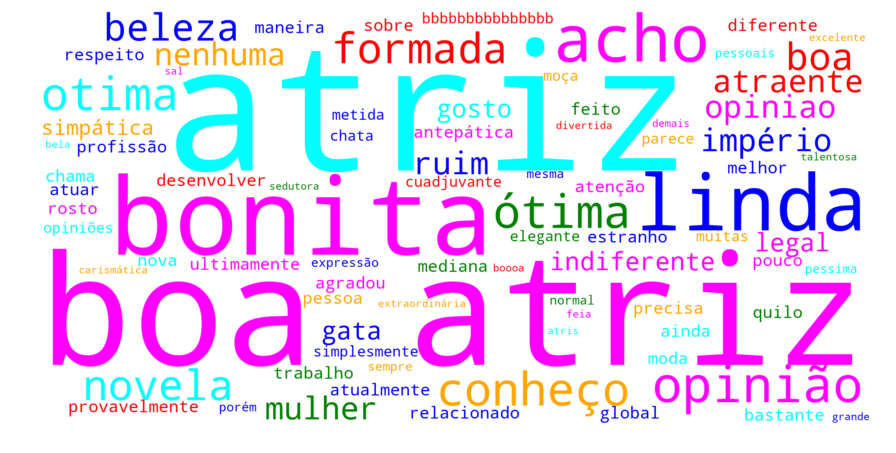

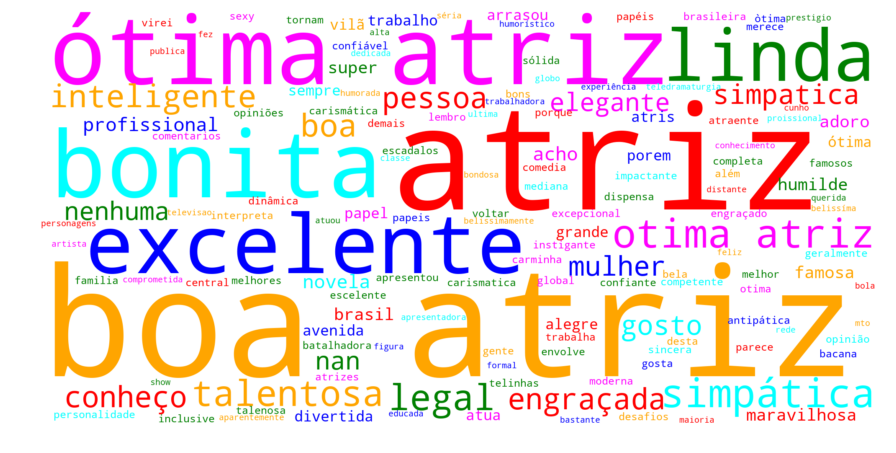

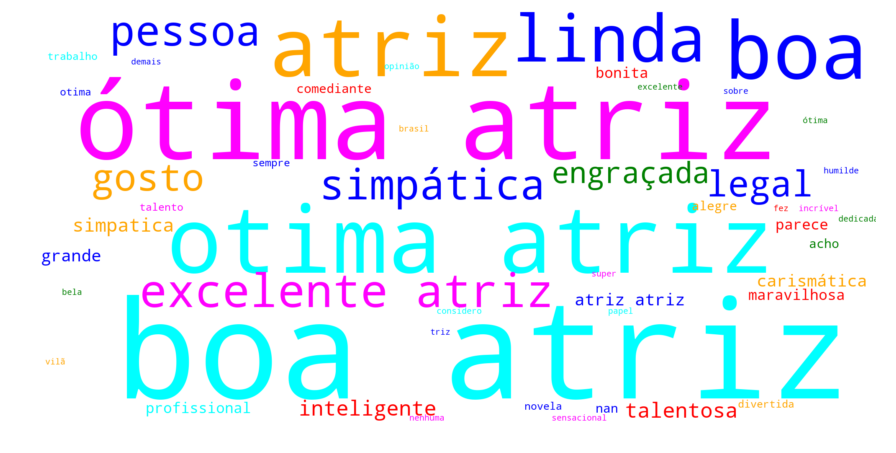

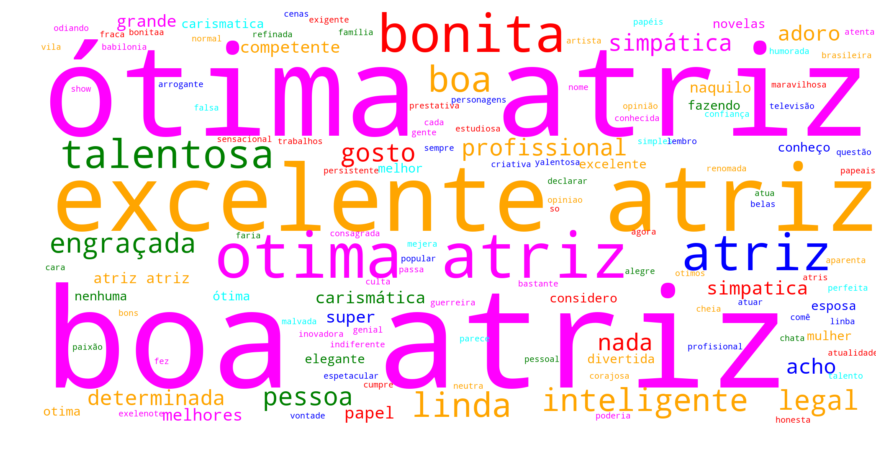

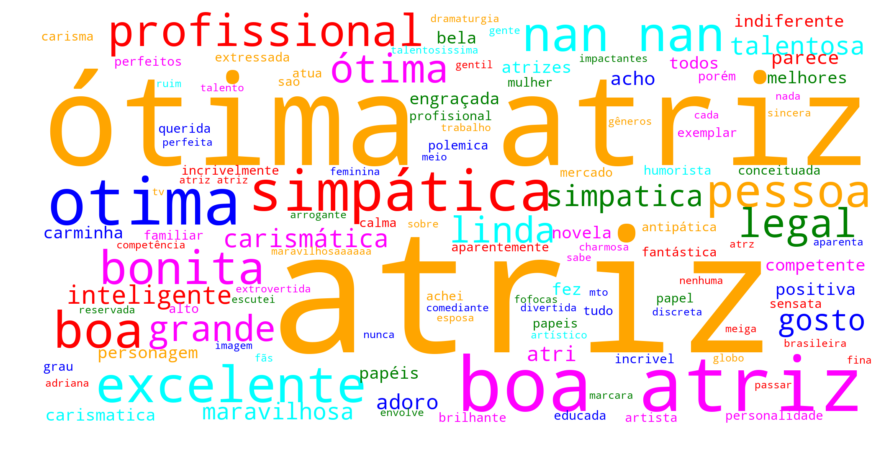

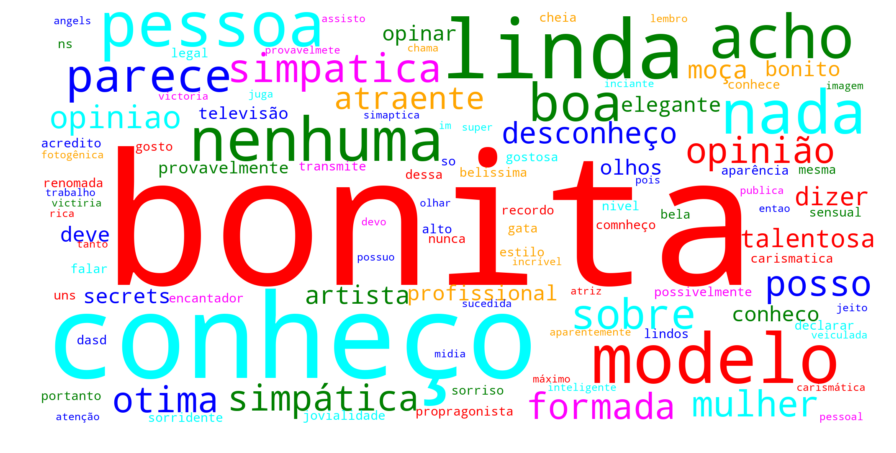

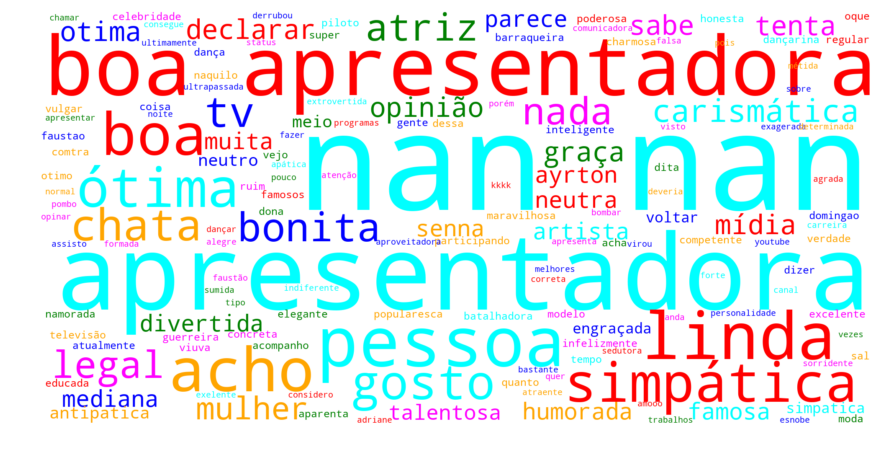

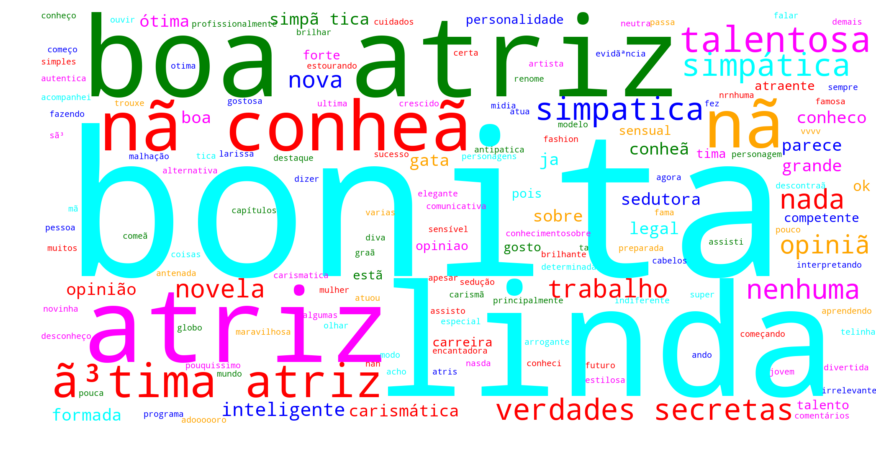

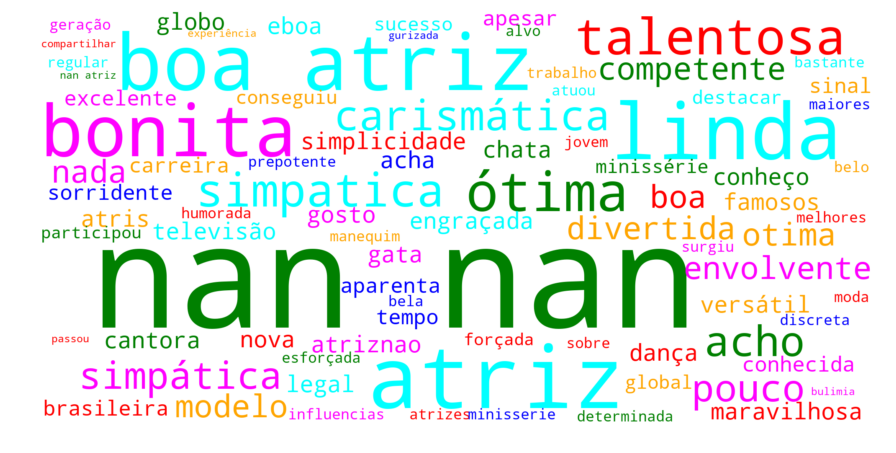

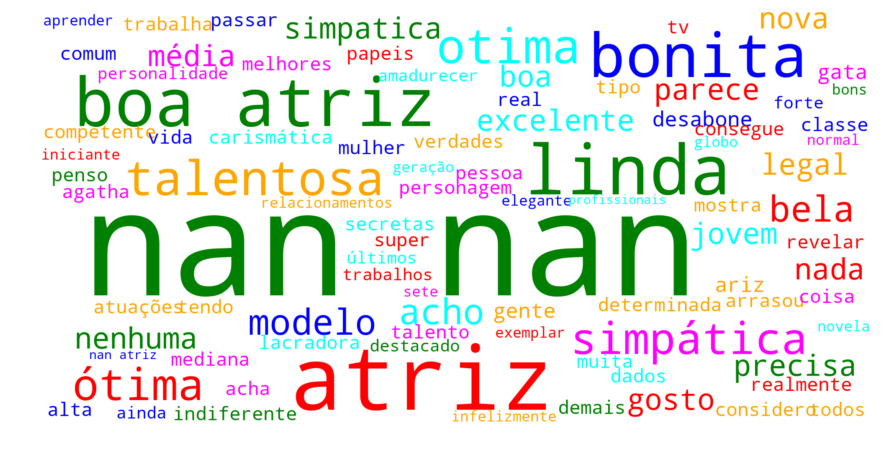

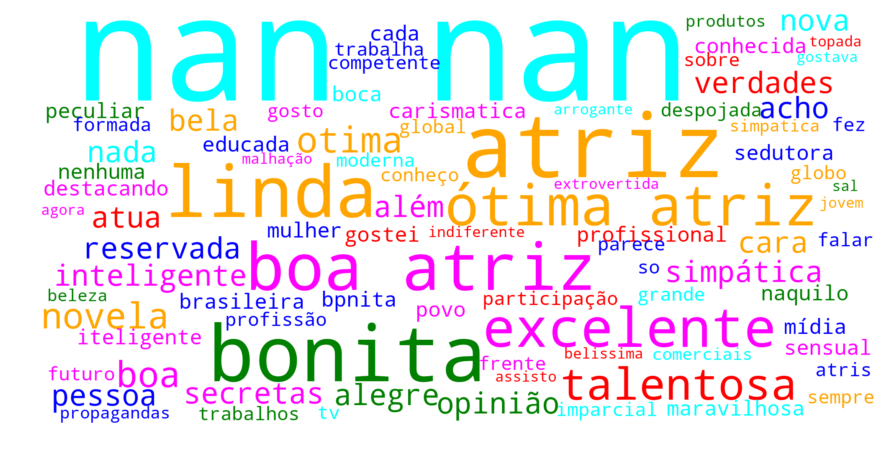

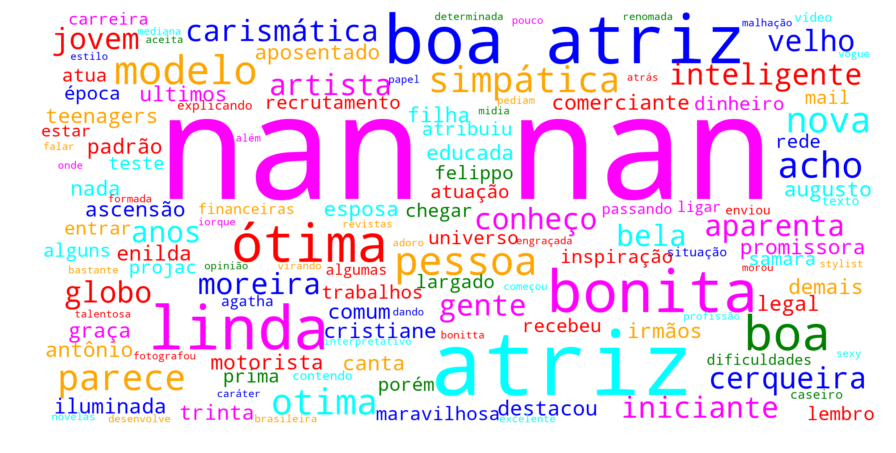

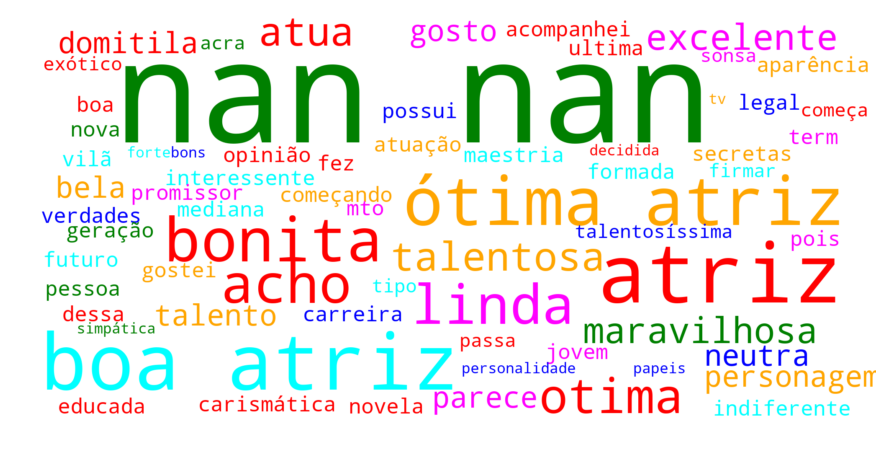

KeyboardInterrupt: 

In [63]:
#Cria um loop para ler conteúdo de cada arquivo de texto dentro do corpus
#Criar a nuvem de palavras para cada arquivo
#E, se foi solicitado no início do script, gerar as imagens das nuvens de cada celebridade por flight
for w in arquivos:
    texto = corpus.raw(w)
    
    cores = ListedColormap(['green', 'blue', 'red', 'orange', 'magenta', 'cyan'])
    nuvem = WordCloud(background_color = 'white',
                     colormap = cores,
                     stopwords = stp,
                     max_words = 500,
                     prefer_horizontal = 1,
                     scale = 5
                     ).generate(texto)
    
    plt.figure(figsize=(15,10))
    plt.imshow(nuvem, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
    
    if OPT_GERAR_VW_NUVEM == 1:
        nuvem.to_file(PATH_NV_IMG + '\{0}.png'.format(w[:-4]))